In [2]:
pip install music21

In [29]:
import os
import random
import warnings
from music21 import midi, environment

# Disable warnings
warnings.filterwarnings("ignore", category=UserWarning, module="music21.*")

# Set the directory containing the MIDI files
directory = r'E:\Piano Dataset\All clips togethter'

# Function to play a MIDI file
def play_midi(midi_file):
    mf = midi.MidiFile()
    mf.open(midi_file)
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    s.show('midi')

# List all MIDI files in the directory
midi_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.mid')]

# Randomly select 3 MIDI files
selected_files = random.sample(midi_files, 3)

# Play each selected MIDI file with controls
for i, midi_file in enumerate(selected_files):
    print(f"Playing MIDI file {i+1}: {midi_file}")
    play_midi(midi_file)


Playing MIDI file 1: E:\Piano Dataset\All clips togethter\mz_570_3.mid


Playing MIDI file 2: E:\Piano Dataset\All clips togethter\haydn_33_1.mid


Playing MIDI file 3: E:\Piano Dataset\All clips togethter\chpn-p8.mid


In [3]:
import os
import pretty_midi

directory_path = r"E:\Piano Dataset\All clips togethter"
midi_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(".mid")]

# Load a few MIDI files
num_files_to_load = 5
loaded_midis = []
for midi_file in midi_files[:num_files_to_load]:
    try:
        midi_data = pretty_midi.PrettyMIDI(midi_file)
        loaded_midis.append(midi_data)
        print("Loaded:", midi_file)
    except Exception as e:
        print("Error loading {}: {}".format(midi_file, e))


Loaded: E:\Piano Dataset\All clips togethter\alb_esp1.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_esp2.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_esp3.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_esp4.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_esp5.mid


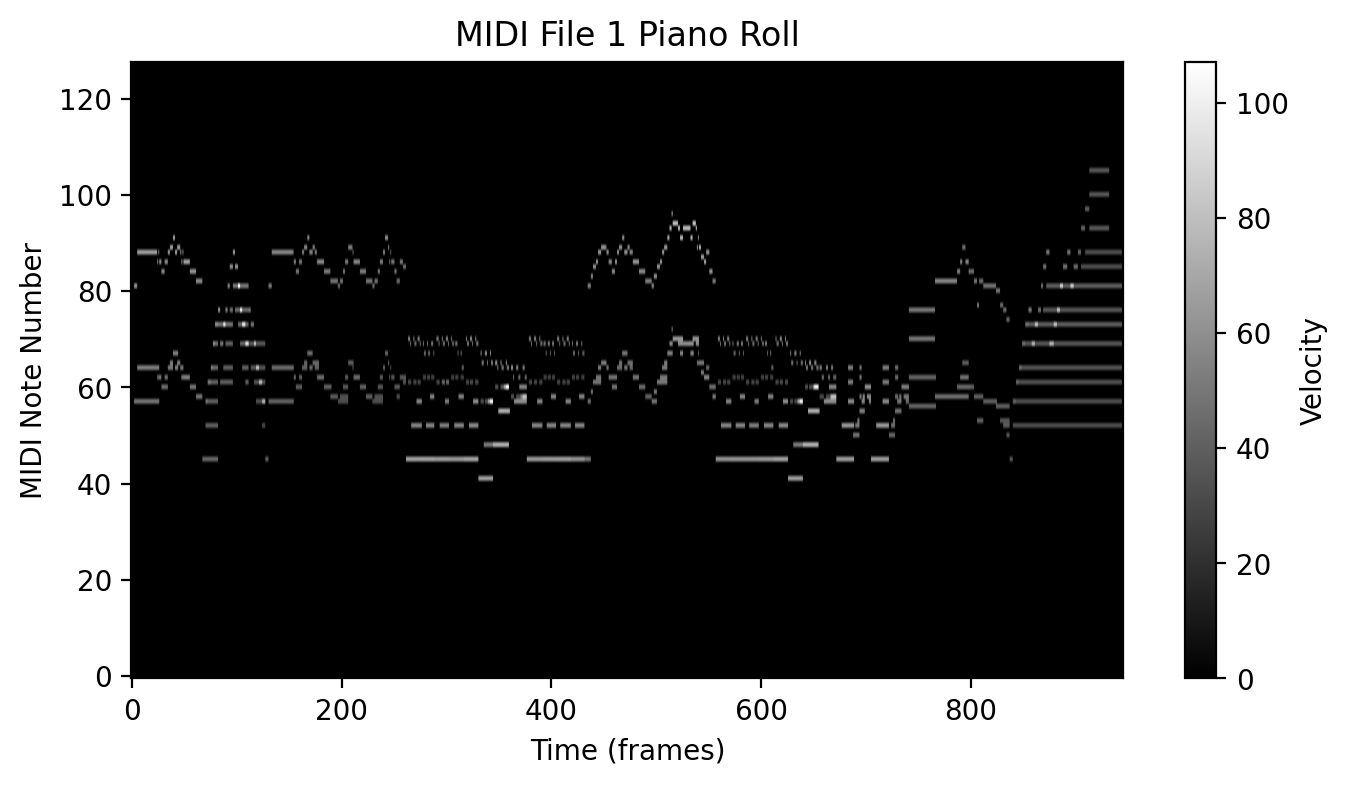

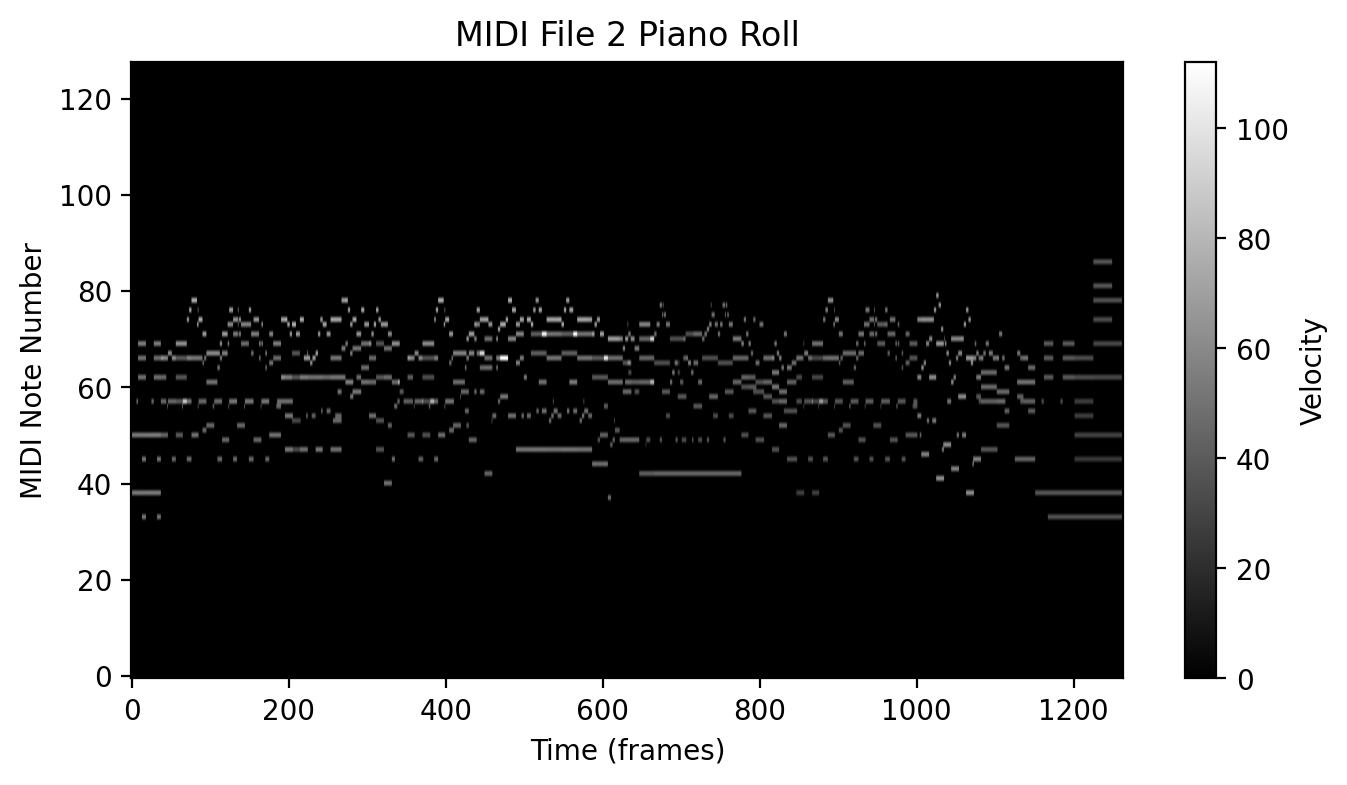

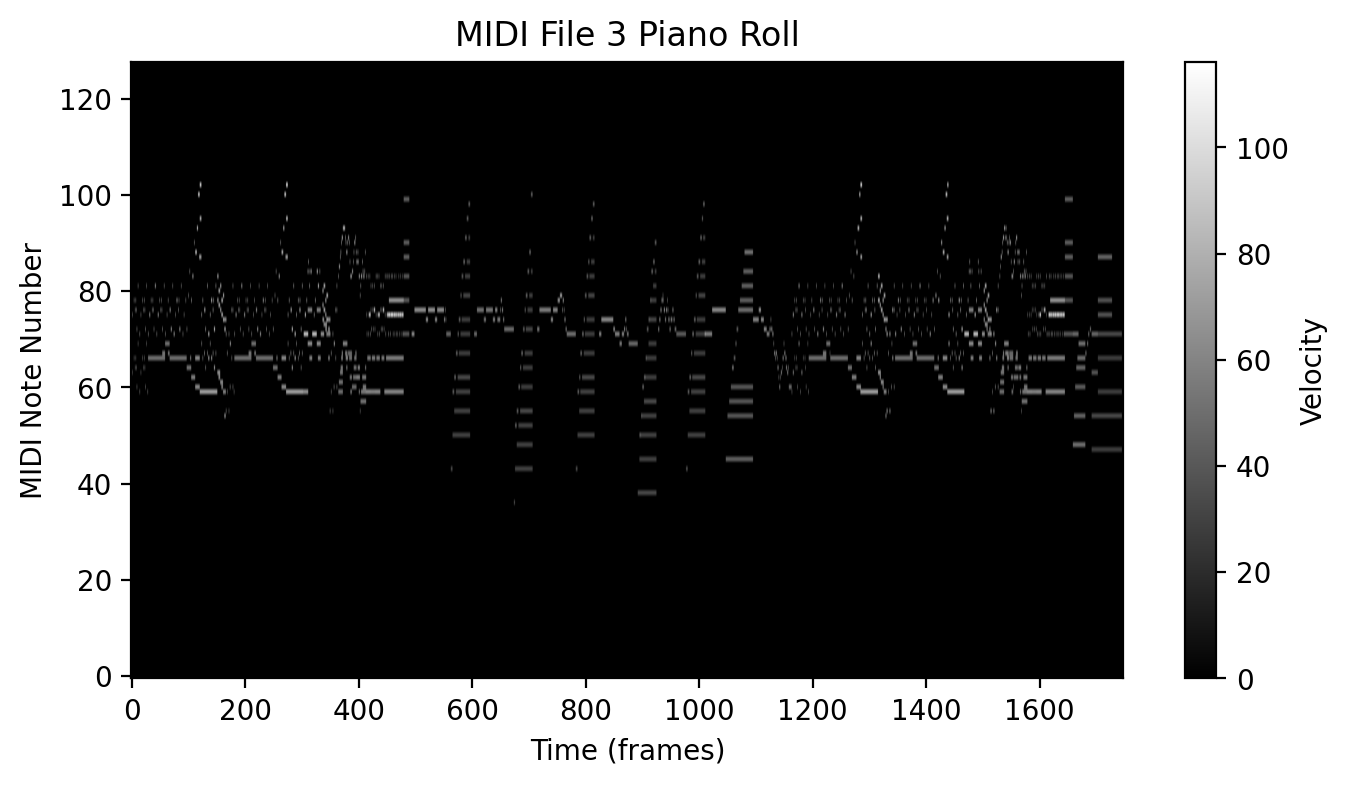

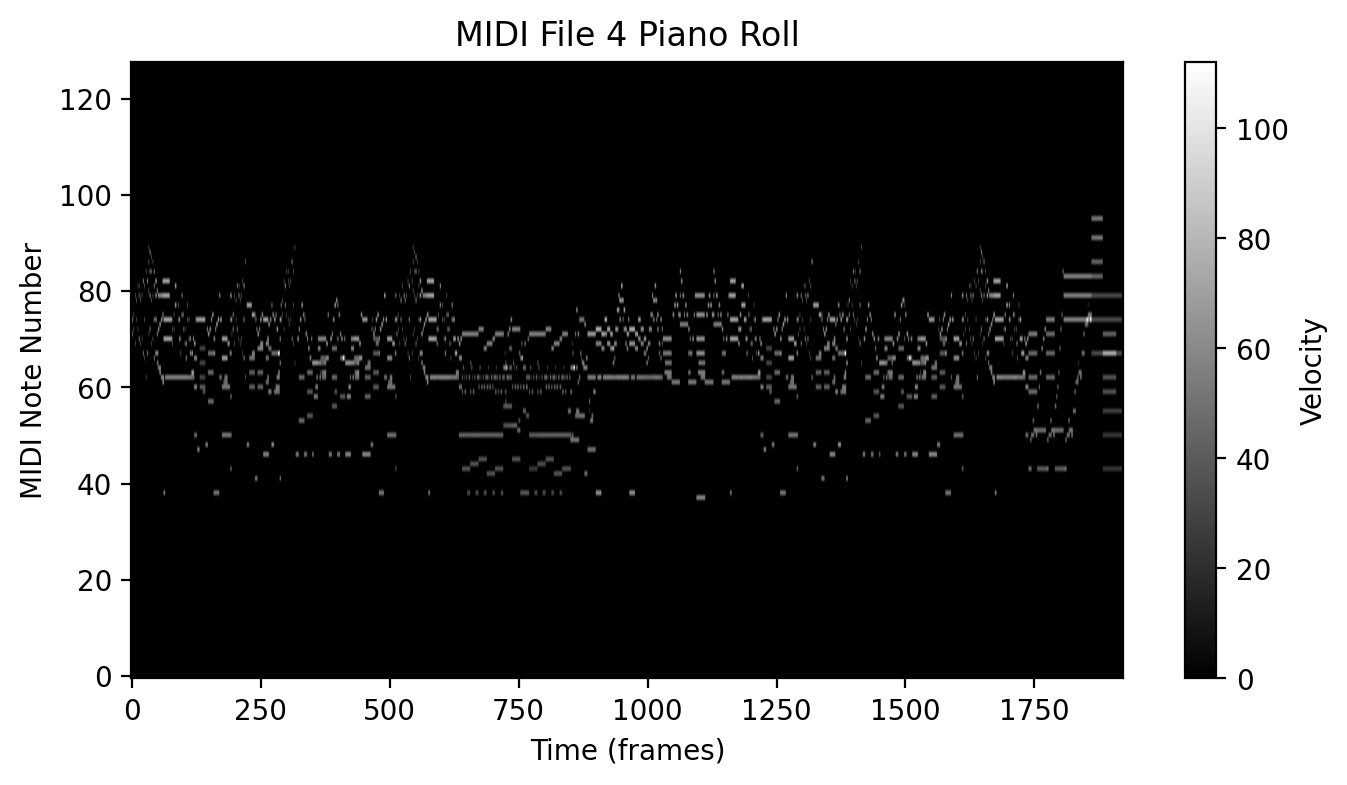

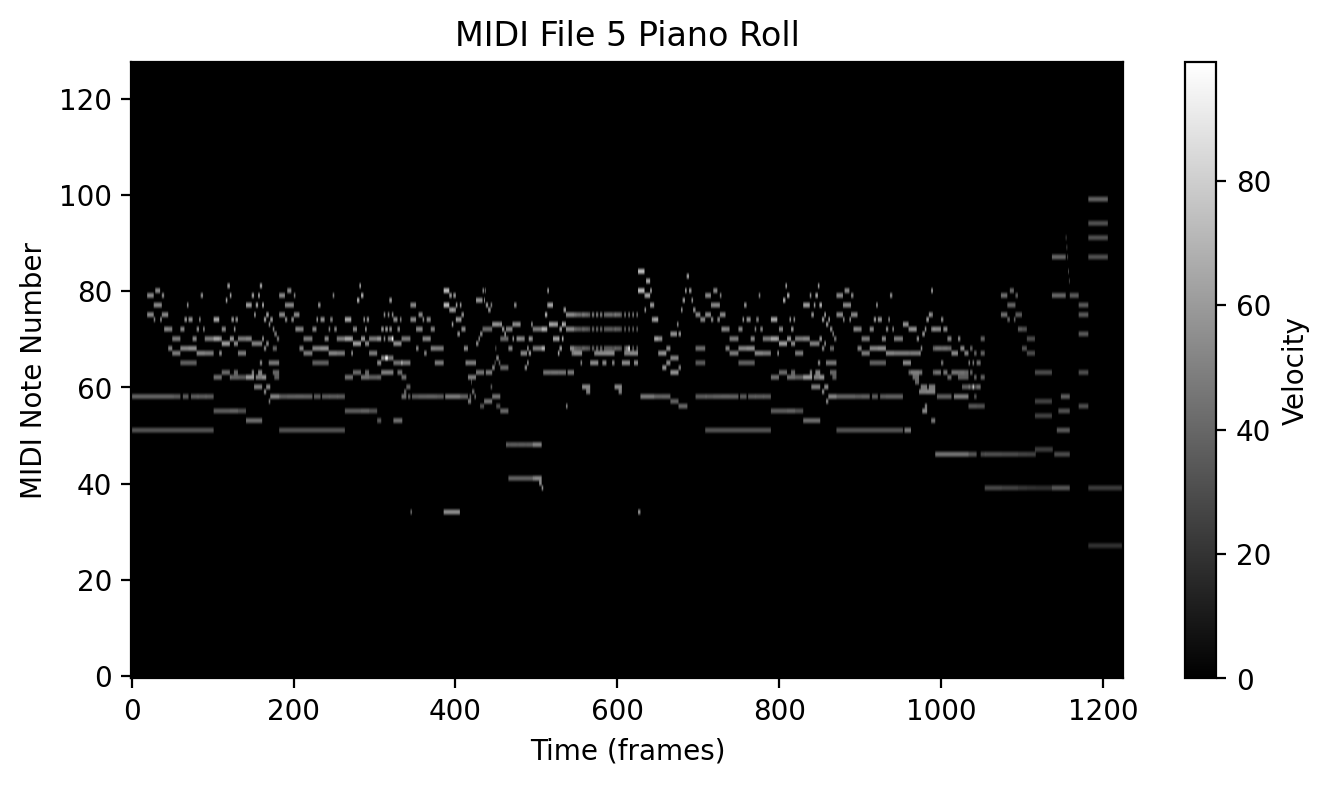

In [4]:
import matplotlib.pyplot as plt

# Visualize piano rolls for the loaded MIDI files
for i, midi_data in enumerate(loaded_midis):
    piano_roll = midi_data.get_piano_roll(fs=10)
    plt.figure(figsize=(8, 4))
    plt.imshow(piano_roll, origin="lower", aspect="auto", cmap="gray")
    plt.title(f"MIDI File {i+1} Piano Roll")
    plt.xlabel("Time (frames)")
    plt.ylabel("MIDI Note Number")
    plt.colorbar(label="Velocity")
    plt.show()

In [5]:
# Extract metadata from the loaded MIDI files
for i, midi_data in enumerate(loaded_midis):
    tempo = midi_data.estimate_tempo()
    time_signature_changes = midi_data.time_signature_changes
    key_signature_changes = midi_data.key_signature_changes
    print(f"MIDI File {i+1} - Tempo: {tempo}, Time Signatures: {time_signature_changes}, Key Signatures: {key_signature_changes}")
"""
MIDI File 1:

Tempo: 198.50458625171547 bpm (beats per minute)
Time Signatures: A single time signature of 3/4 (3 beats per measure, quarter note gets the beat) at time 0.0 seconds.
Key Signatures: A single key signature with 5 sharps (Key of B major or G# minor) at time 0.0 seconds.

MIDI File 2:

Tempo: 168.51237286982393 bpm
Time Signatures: A single time signature of 2/4 (2 beats per measure, quarter note gets the beat) at time 0.0 seconds.
Key Signatures: A single key signature with 2 sharps (Key of D major or B minor) at time 0.0 seconds.

The tempo is the speed of the music, 
the time signature indicates the number of beats in each measure and which note value gets the beat, 
and the key signature indicates the key of the music (the tonal center or home note)
"""

MIDI File 1 - Tempo: 198.50458625171547, Time Signatures: [TimeSignature(numerator=3, denominator=4, time=0.0)], Key Signatures: [KeySignature(key_number=5, time=0.0)]
MIDI File 2 - Tempo: 168.51237286982393, Time Signatures: [TimeSignature(numerator=2, denominator=4, time=0.0)], Key Signatures: [KeySignature(key_number=2, time=0.0)]
MIDI File 3 - Tempo: 196.79676049308776, Time Signatures: [TimeSignature(numerator=3, denominator=8, time=0.0), TimeSignature(numerator=3, denominator=4, time=49.09003850833335), TimeSignature(numerator=10, denominator=4, time=104.7684552166666), TimeSignature(numerator=3, denominator=8, time=116.32659318333327), TimeSignature(numerator=3, denominator=4, time=165.88405319166662)], Key Signatures: [KeySignature(key_number=7, time=0.0)]
MIDI File 4 - Tempo: 211.93736483635746, Time Signatures: [TimeSignature(numerator=3, denominator=4, time=0.0)], Key Signatures: [KeySignature(key_number=10, time=0.0), KeySignature(key_number=7, time=64.10016291666668), KeyS

In [6]:
import numpy as np

# Analyze note statistics for the loaded MIDI files
for i, midi_data in enumerate(loaded_midis):
    note_numbers = np.unique([note.pitch for note in midi_data.instruments[0].notes])
    note_durations = [note.end - note.start for note in midi_data.instruments[0].notes]
    velocity_ranges = (min(note.velocity for note in midi_data.instruments[0].notes),
                       max(note.velocity for note in midi_data.instruments[0].notes))
    print(f"MIDI File {i+1} - Note Numbers: {note_numbers}, Note Durations: {note_durations}, Velocity Range: {velocity_ranges}")

MIDI File 1 - Note Numbers: [ 57  58  60  61  62  64  65  67  69  70  73  74  76  77  80  81  82  83
  84  85  86  87  88  89  91  93  94  96  97 100 105], Note Durations: [0.321096, 1.9325532500000002, 0.06666662499999987, 0.06666662499999987, 0.26318350000000024, 0.2666664999999999, 0.2739725000000002, 0.25210100000000013, 0.2439024999999999, 0.23529399999999967, 0.25423750000000034, 0.2521009999999997, 0.13888899999999982, 0.06944450000000035, 0.06944449999999946, 0.5797100000000004, 0.6030150000000001, 0.6030150000000001, 0.25, 0.24793399999999988, 0.242915, 0.24096399999999996, 0.24489799999999917, 0.234375, 0.2400000000000002, 0.22140199999999943, 0.22988499999999945, 0.23622049999999994, 0.2419355000000003, 0.2310964999999996, 0.23889075000000126, 0.24242924999999893, 0.24615874999999932, 0.2499185833333346, 0.26285816666666584, 0.24590150000000044, 0.2553190000000001, 0.26614208333333345, 0.27715358333333384, 0.2850544166666662, 0.29317508333333286, 0.3210960000000007, 1.929921

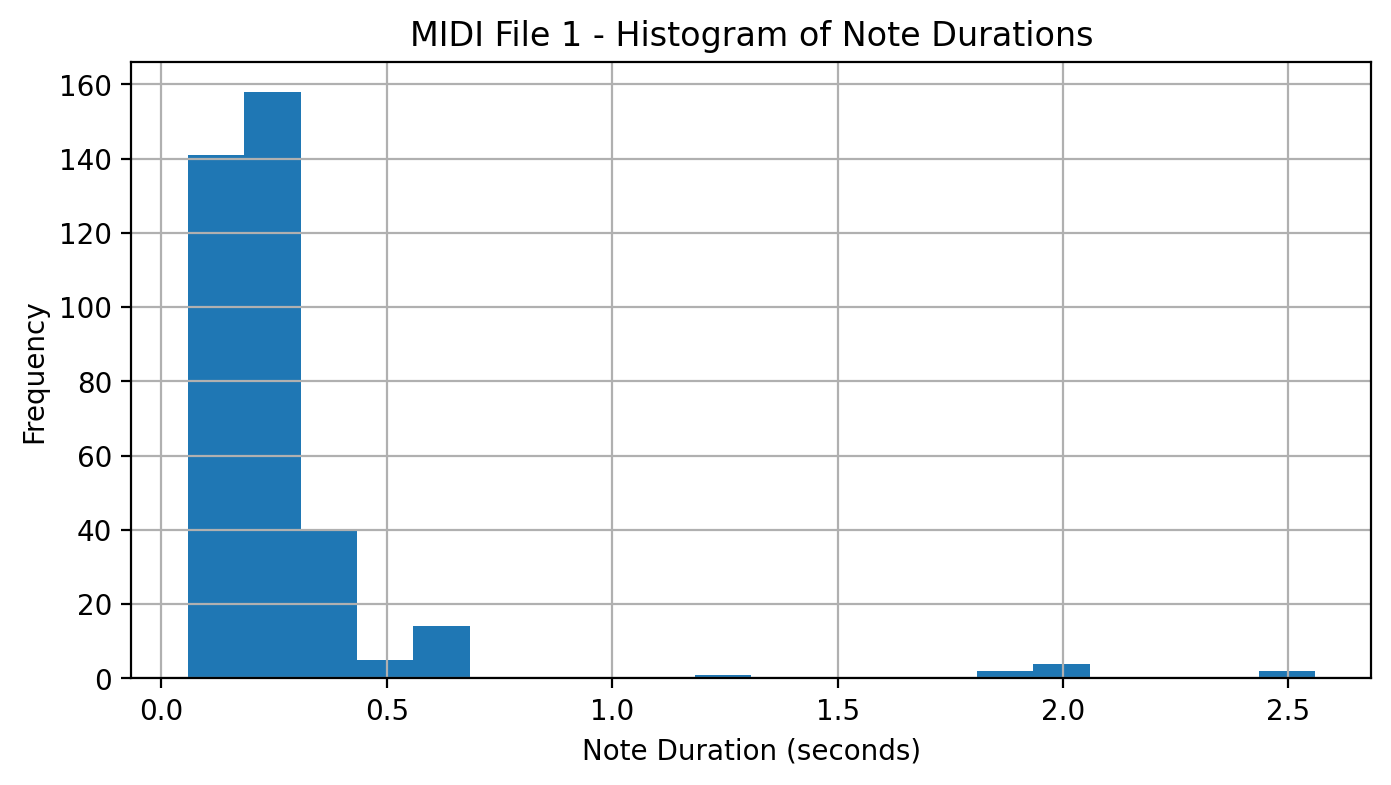

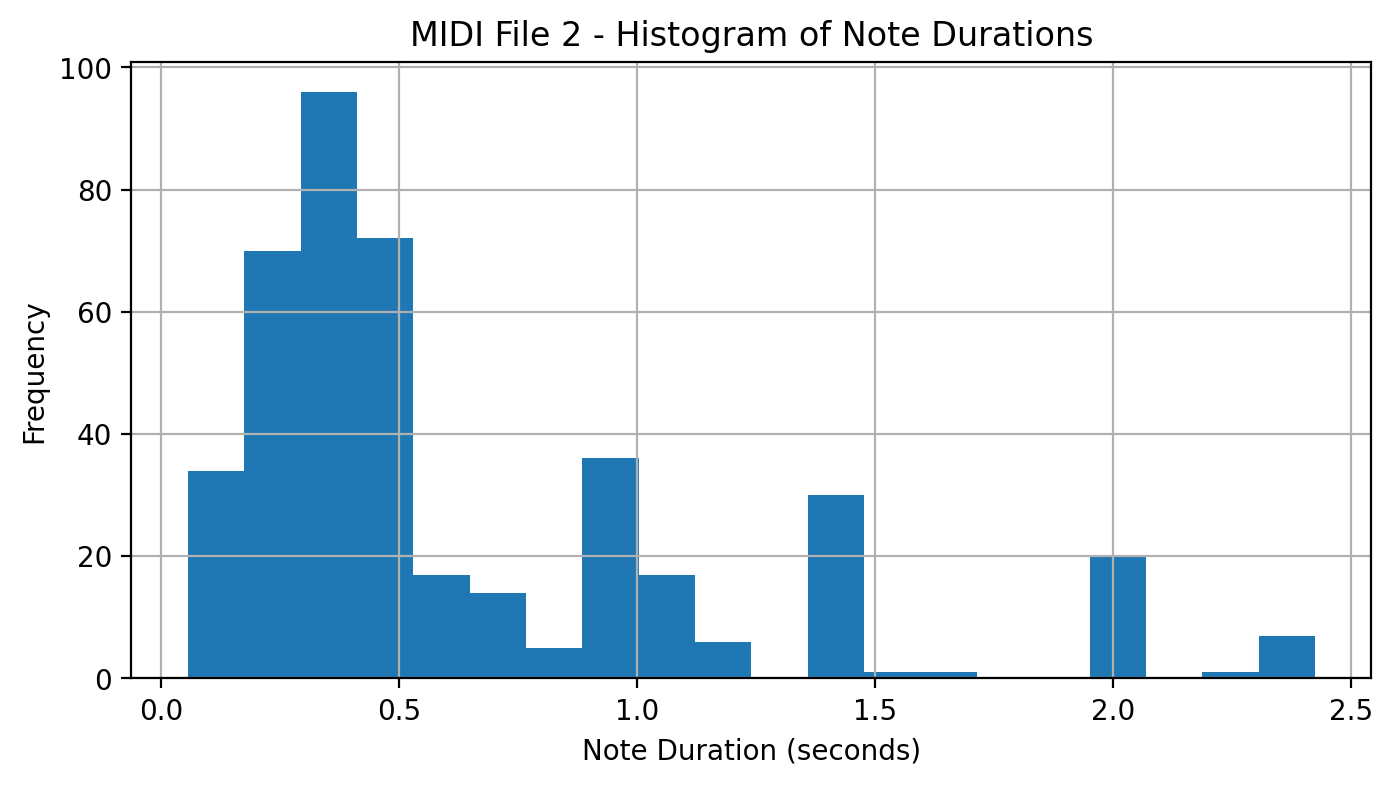

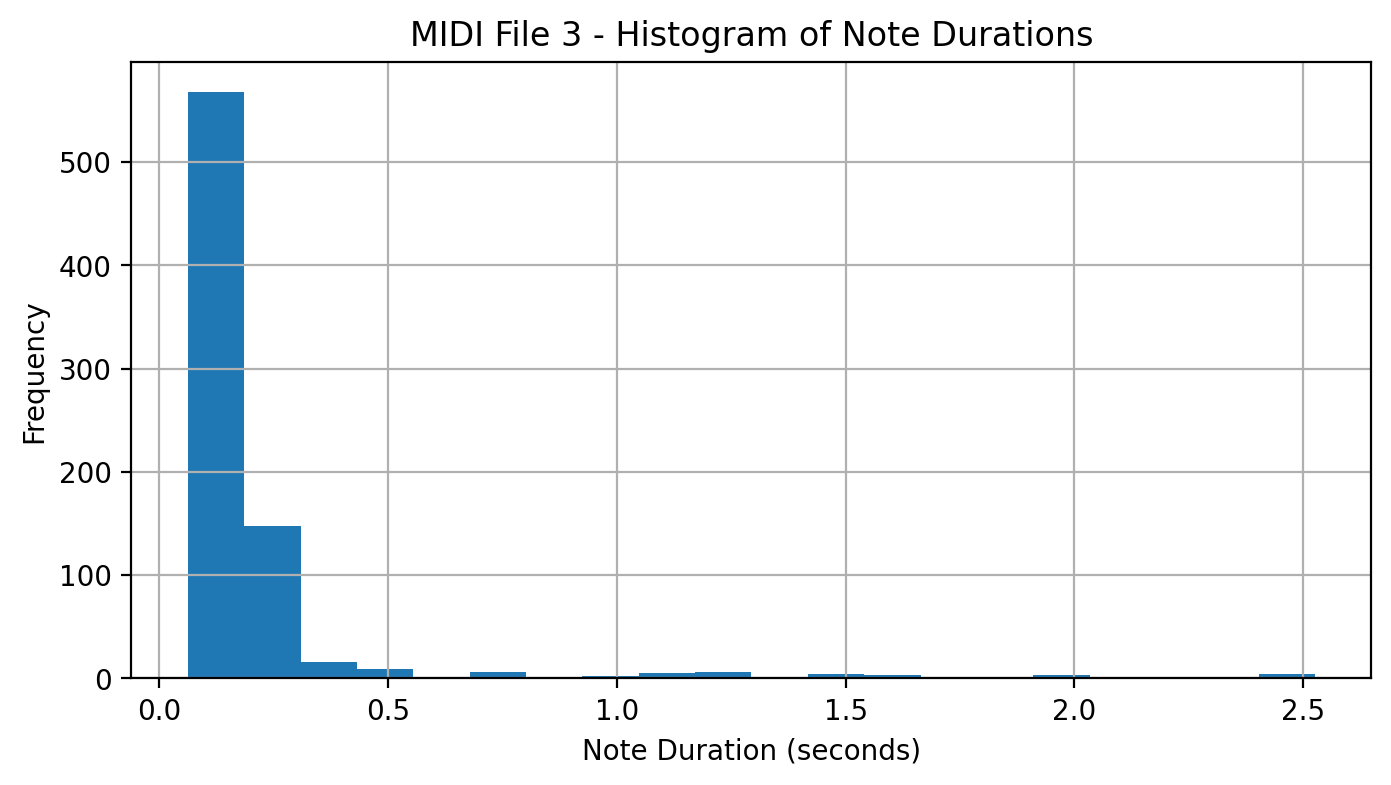

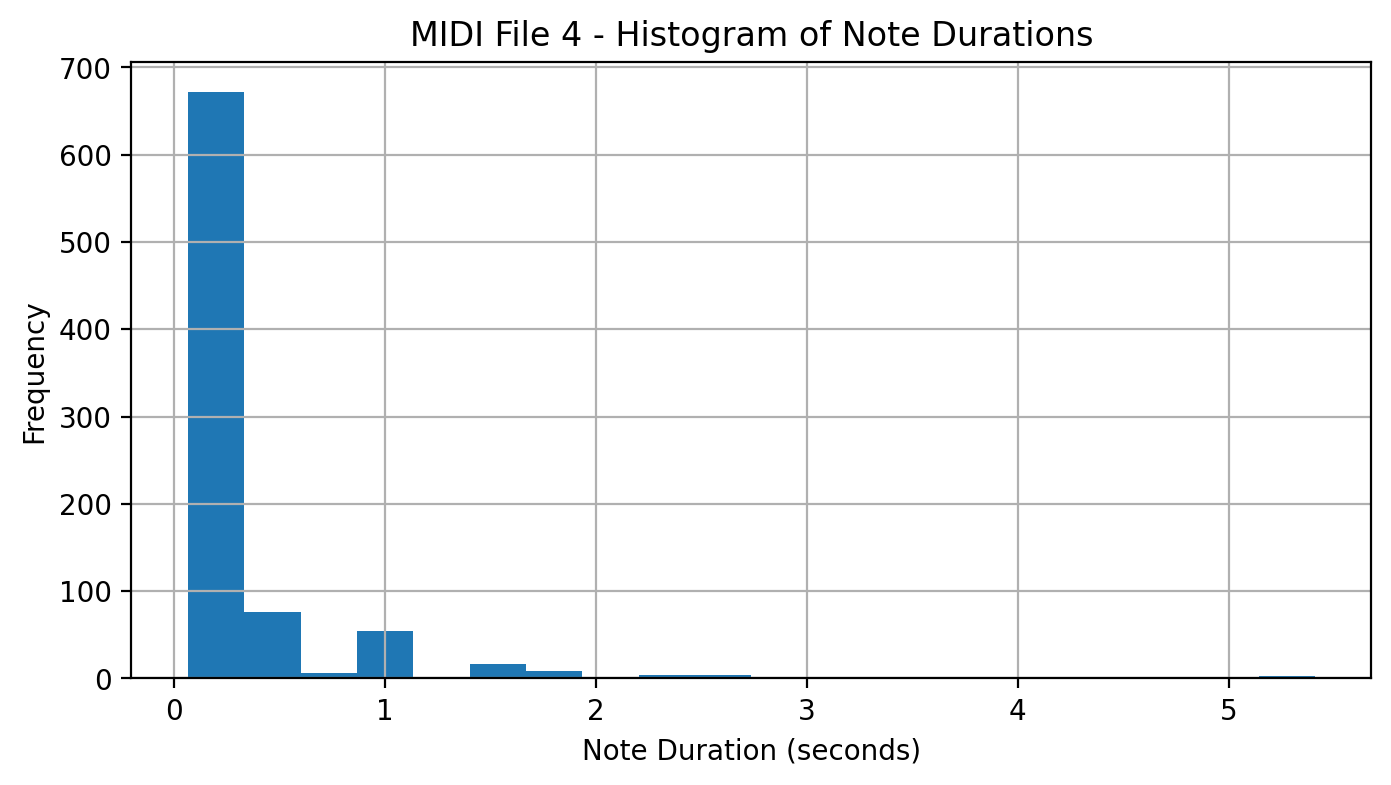

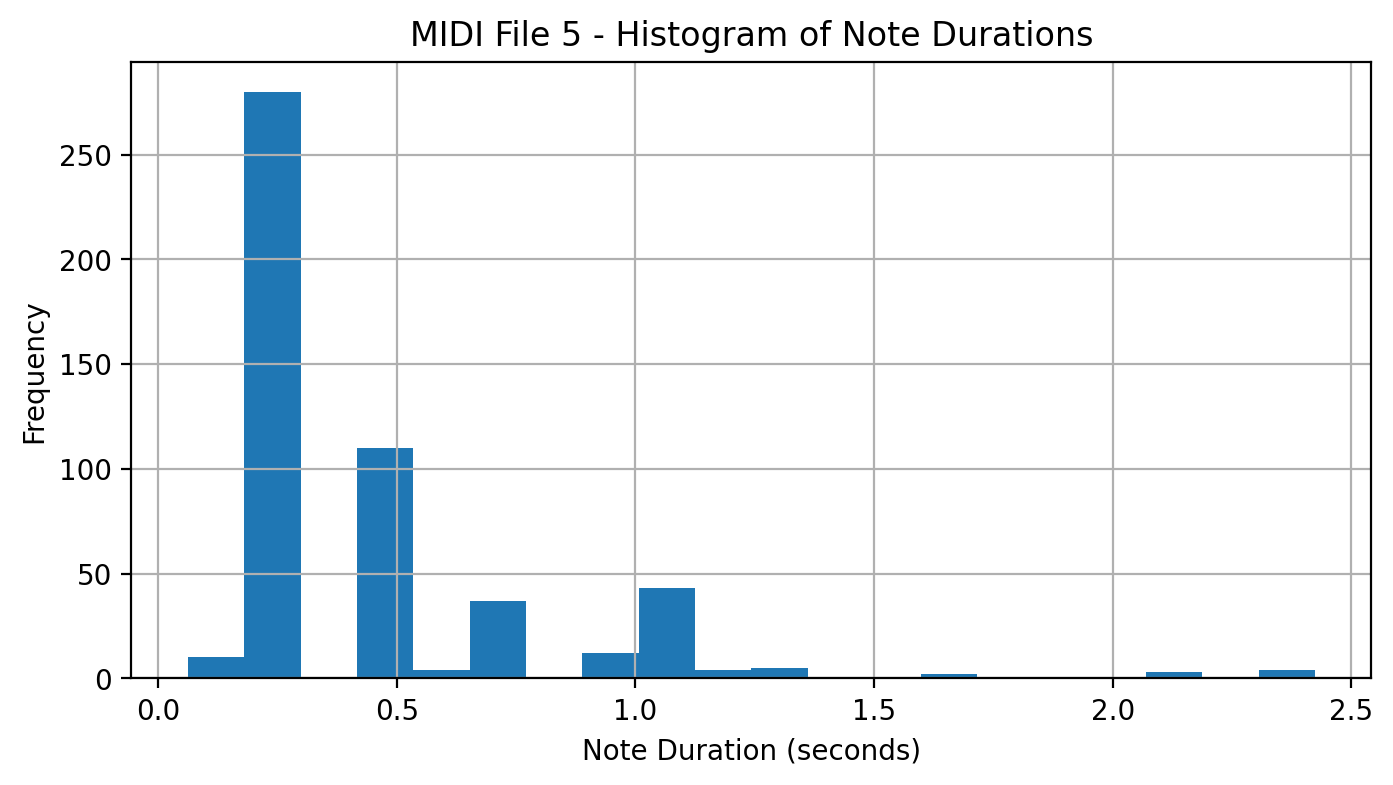

In [7]:
# Visualize a histogram of note durations for each MIDI file
for i, midi_data in enumerate(loaded_midis):
    note_durations = [note.end - note.start for note in midi_data.instruments[0].notes]
    plt.figure(figsize=(8, 4))
    plt.hist(note_durations, bins=20)
    plt.title(f"MIDI File {i+1} - Histogram of Note Durations")
    plt.xlabel("Note Duration (seconds)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

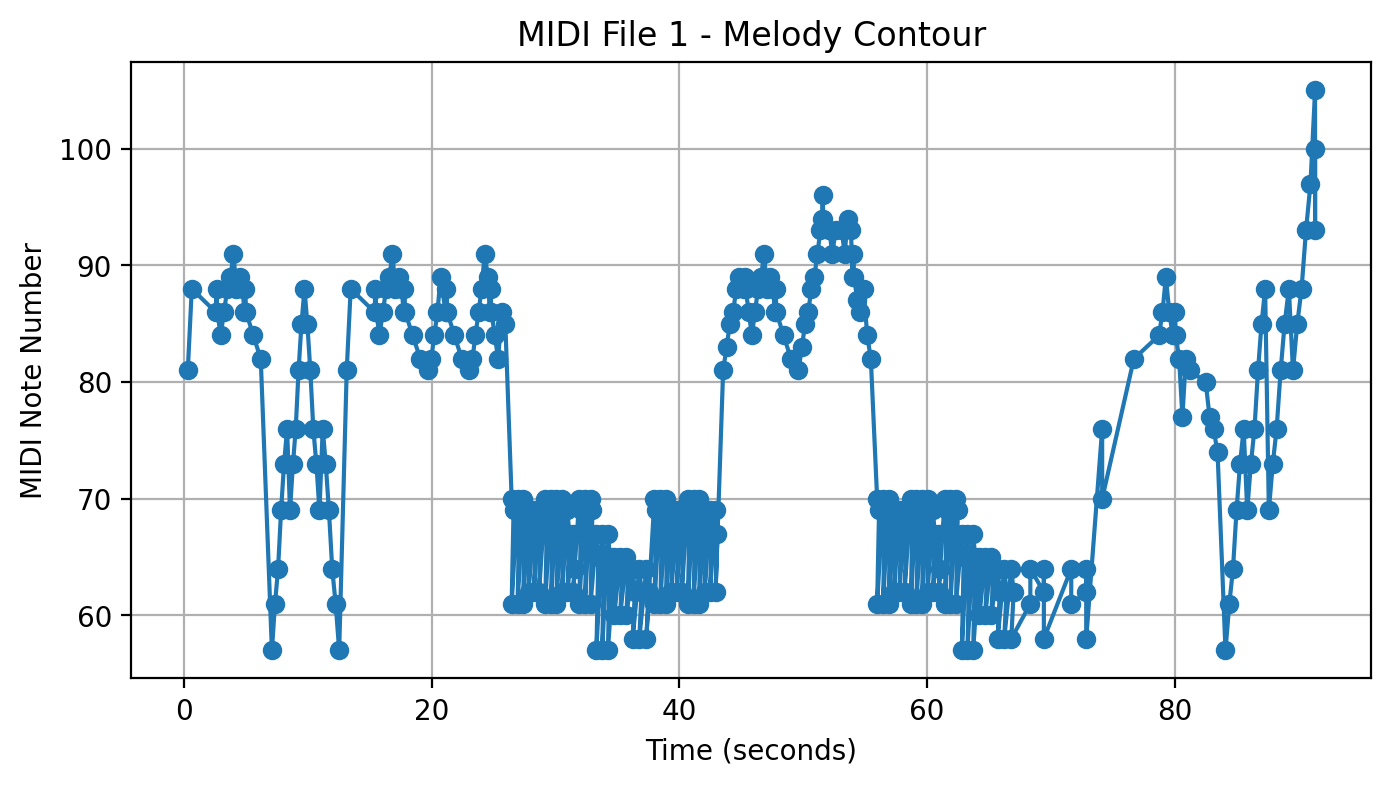

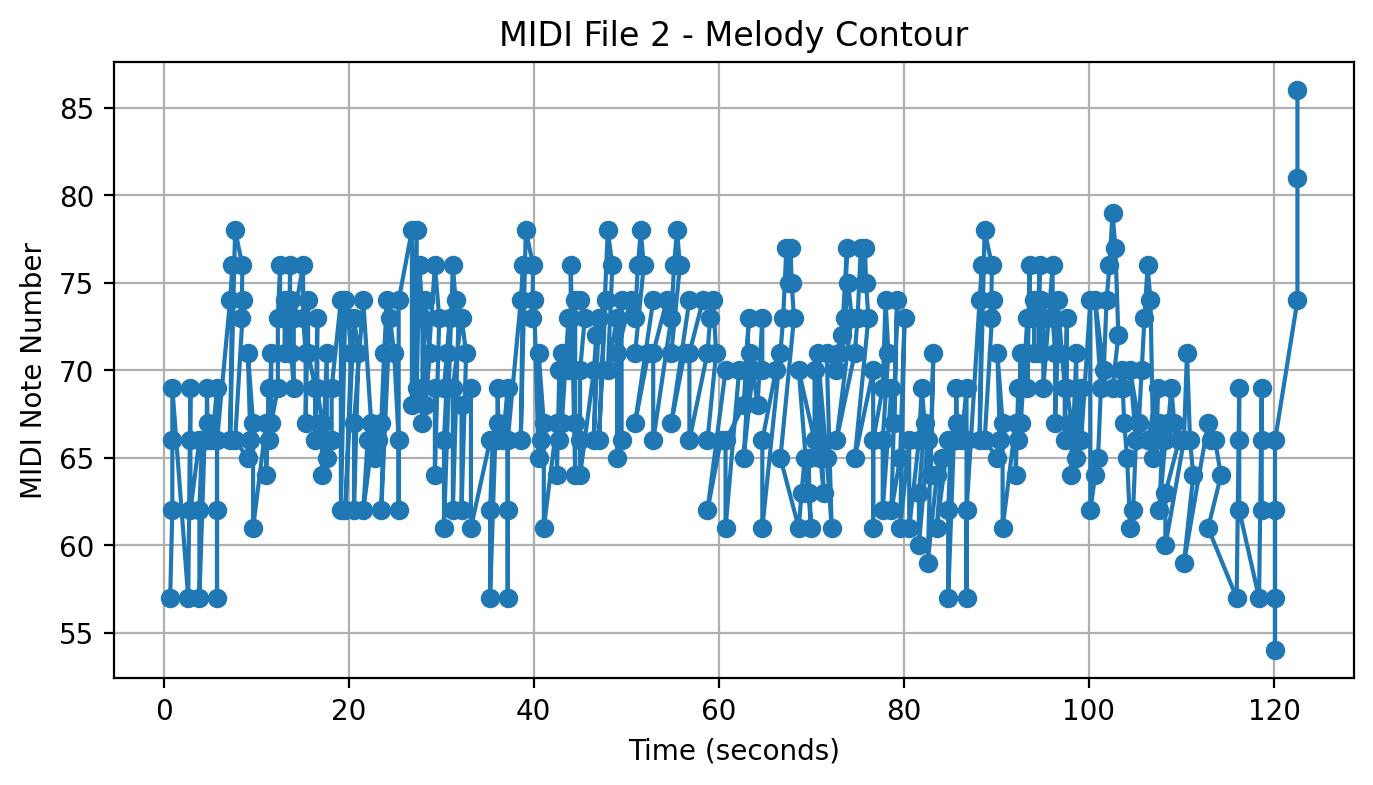

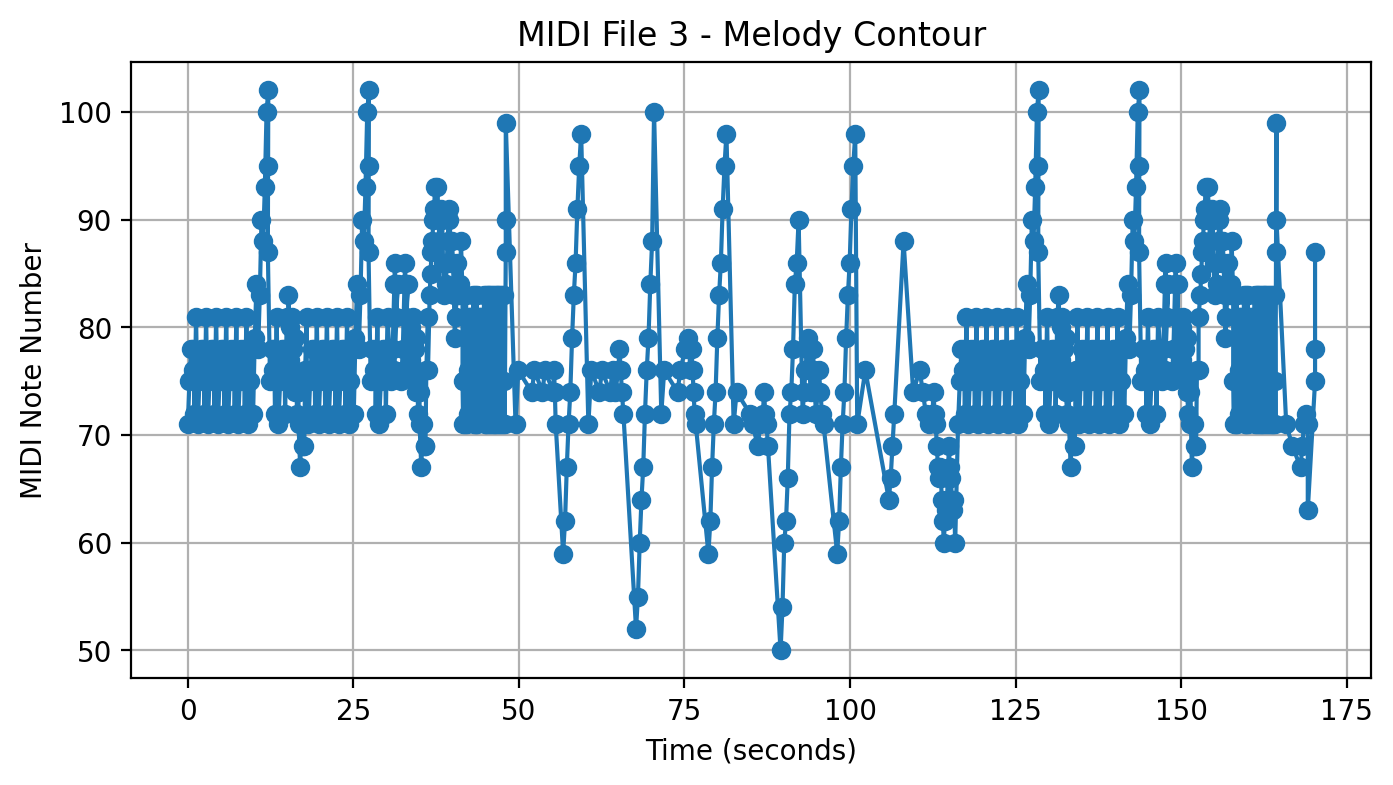

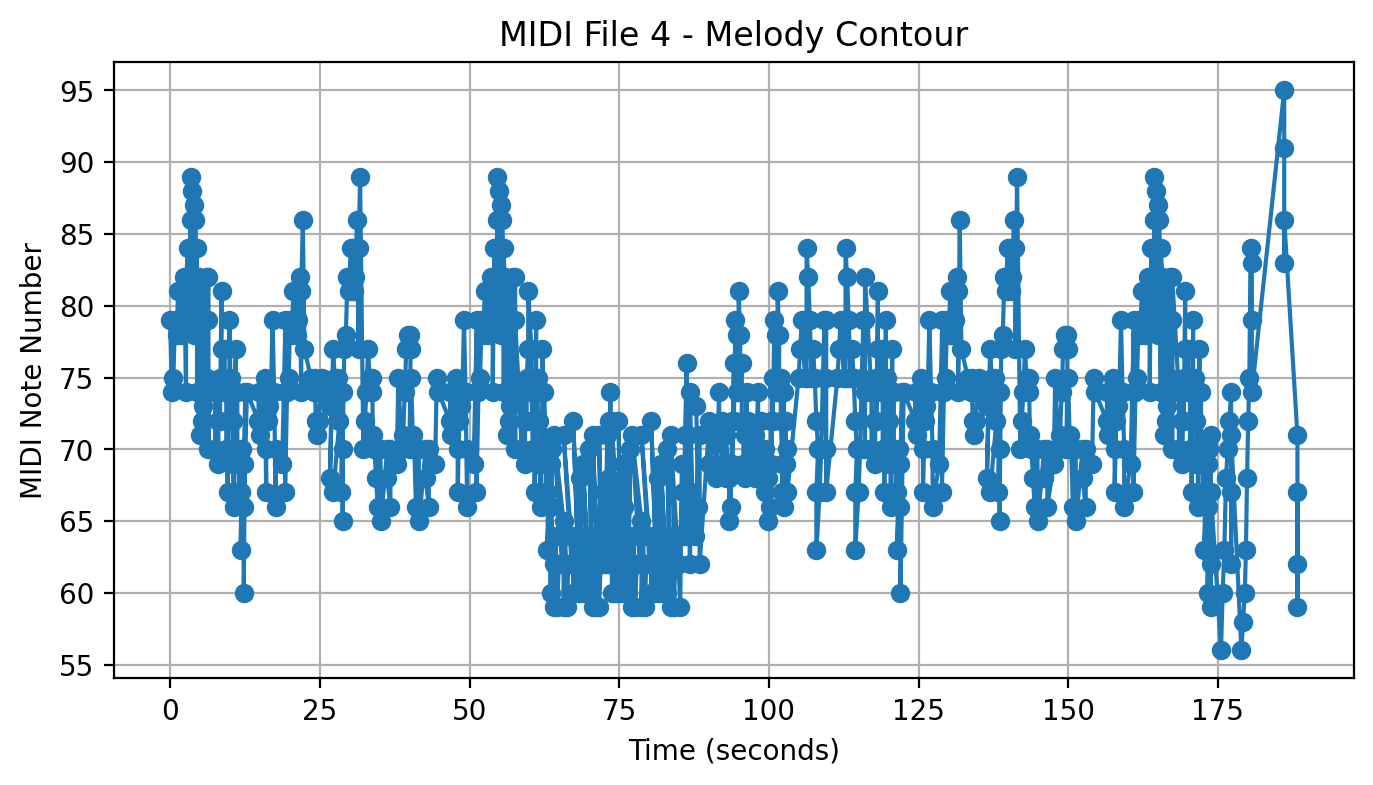

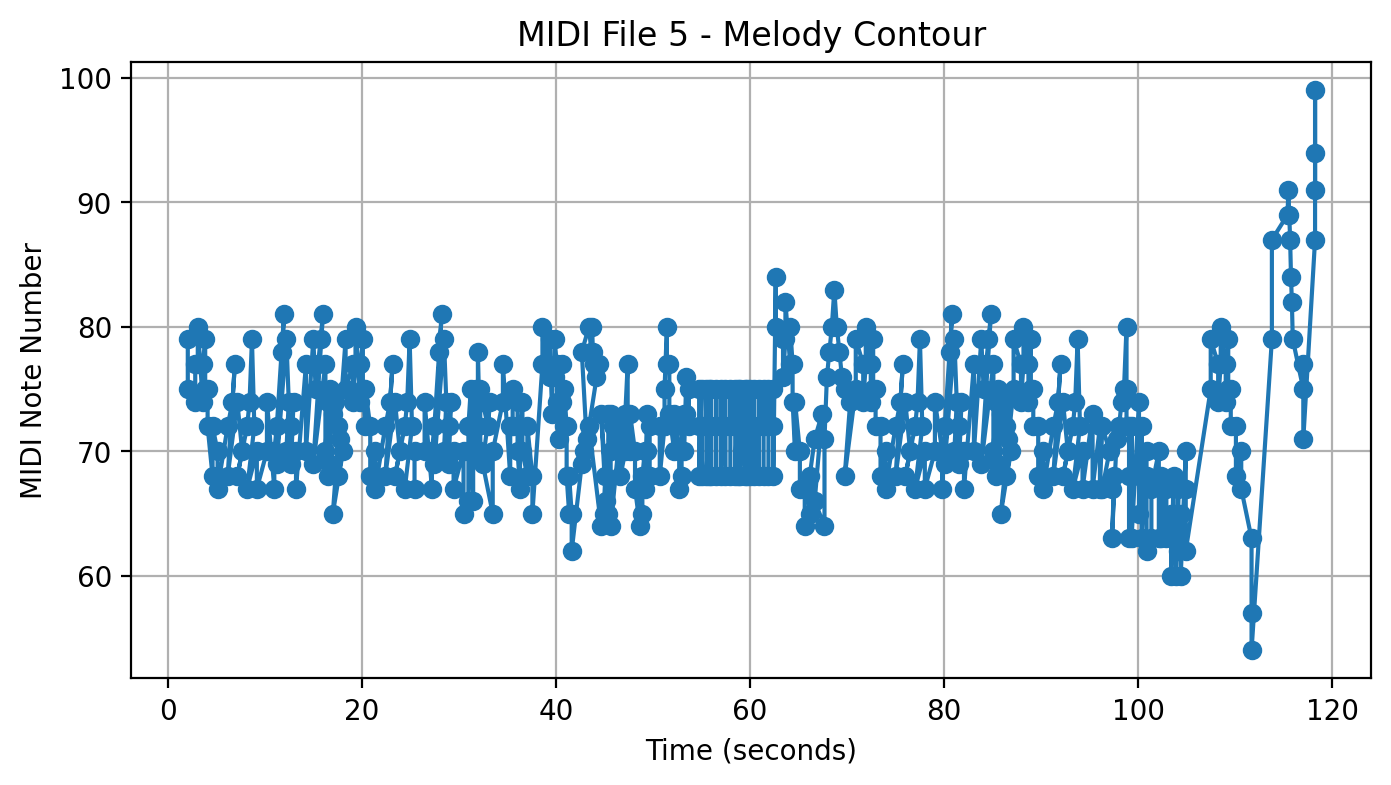

In [8]:
# Plot the melody contour for each MIDI file
for i, midi_data in enumerate(loaded_midis):
    note_onsets = [note.start for note in midi_data.instruments[0].notes]
    note_pitches = [note.pitch for note in midi_data.instruments[0].notes]
    plt.figure(figsize=(8, 4))
    plt.plot(note_onsets, note_pitches, marker='o', linestyle='-')
    plt.title(f"MIDI File {i+1} - Melody Contour")
    plt.xlabel("Time (seconds)")
    plt.ylabel("MIDI Note Number")
    plt.grid(True)
    plt.show()


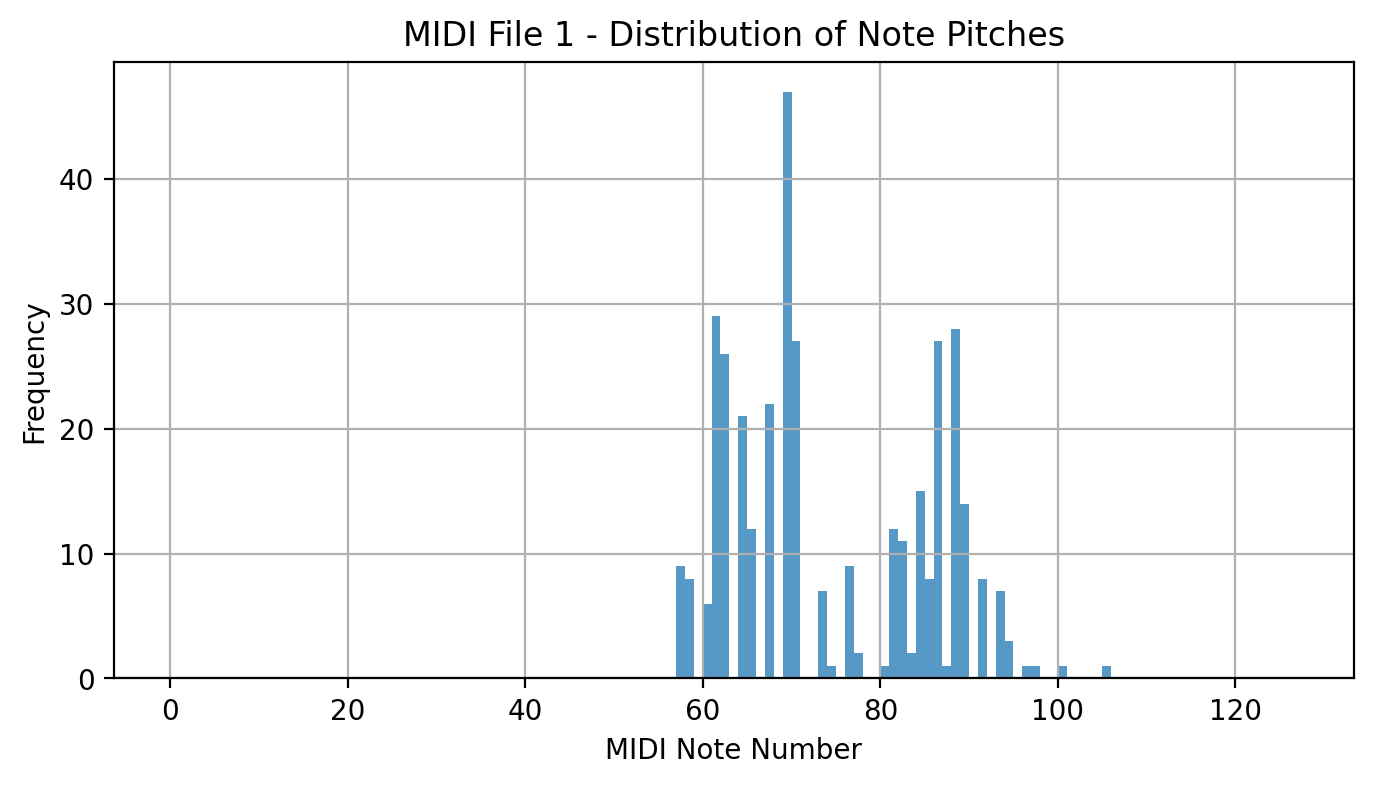

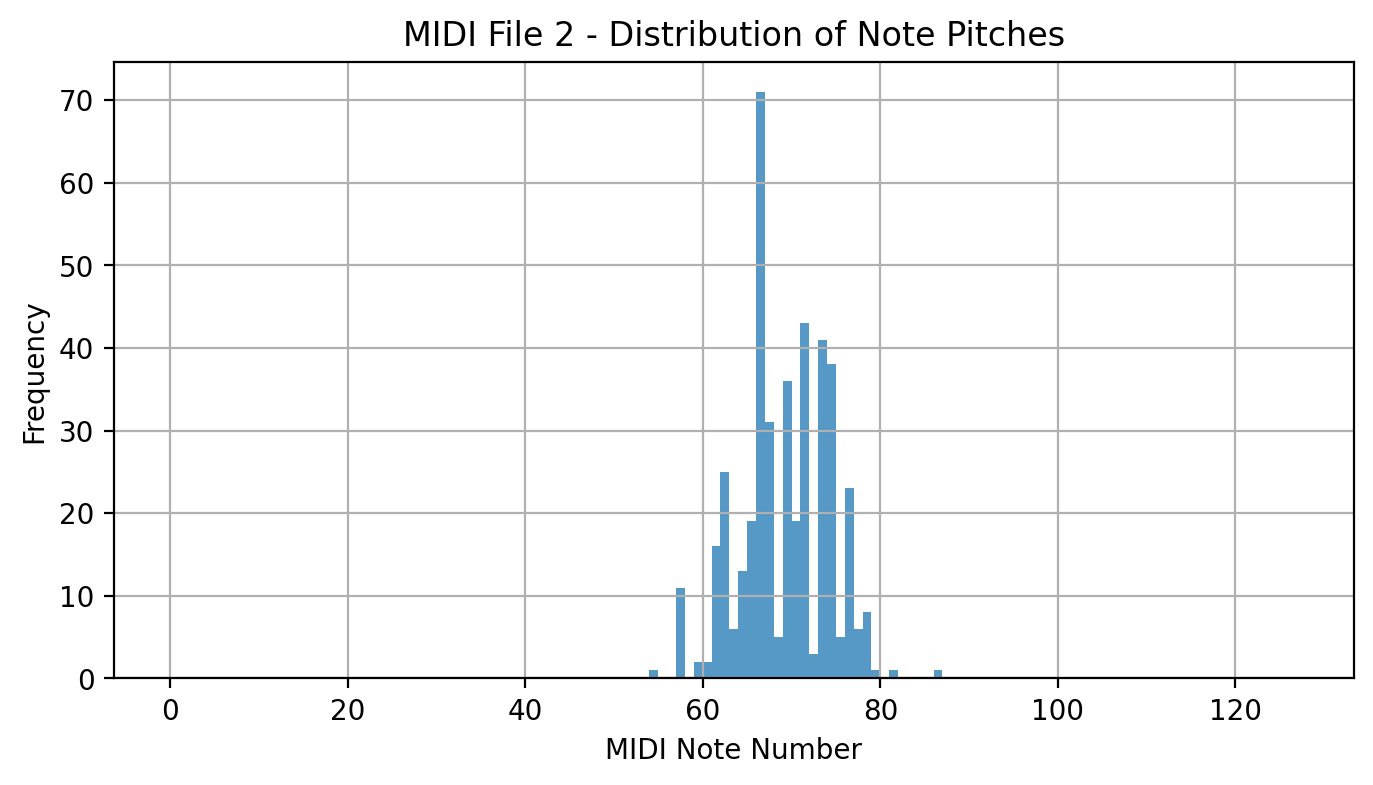

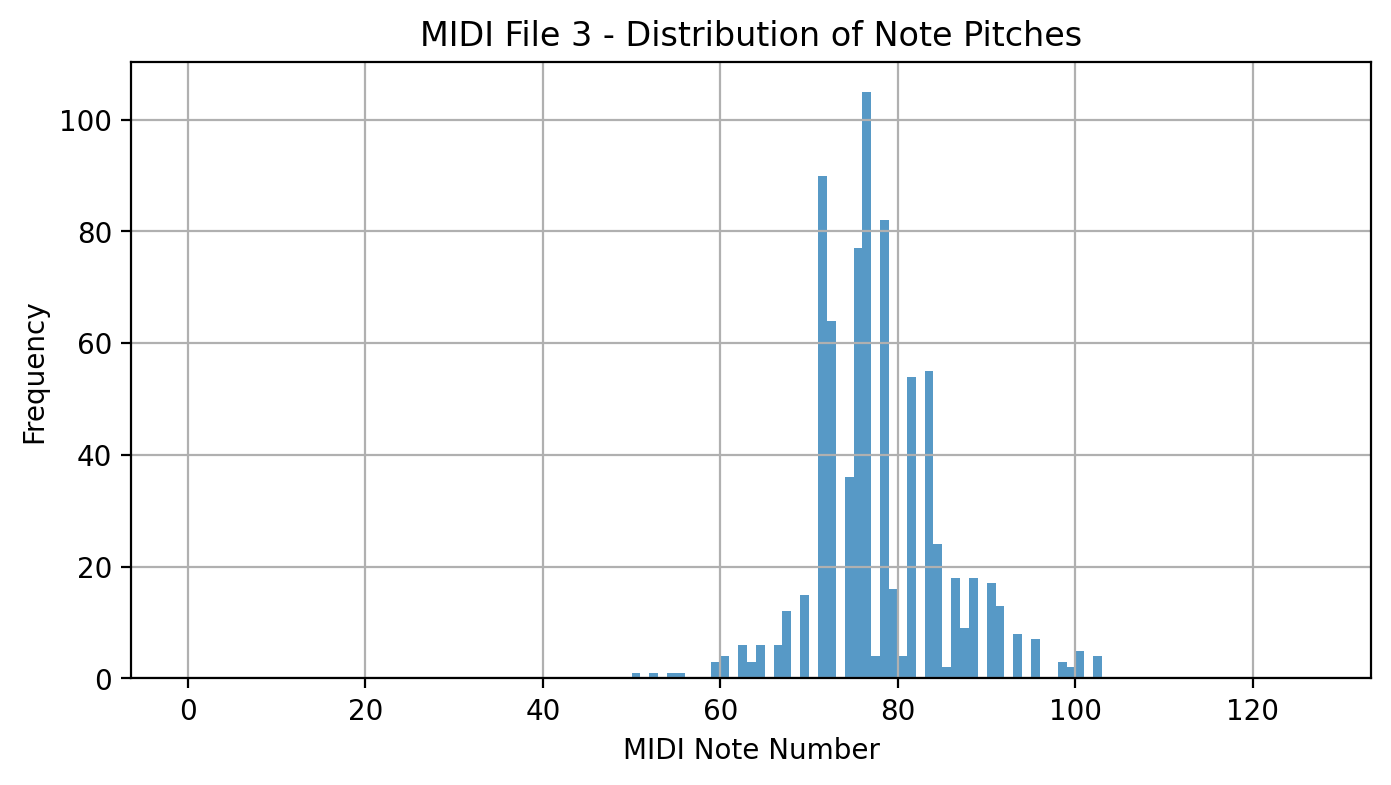

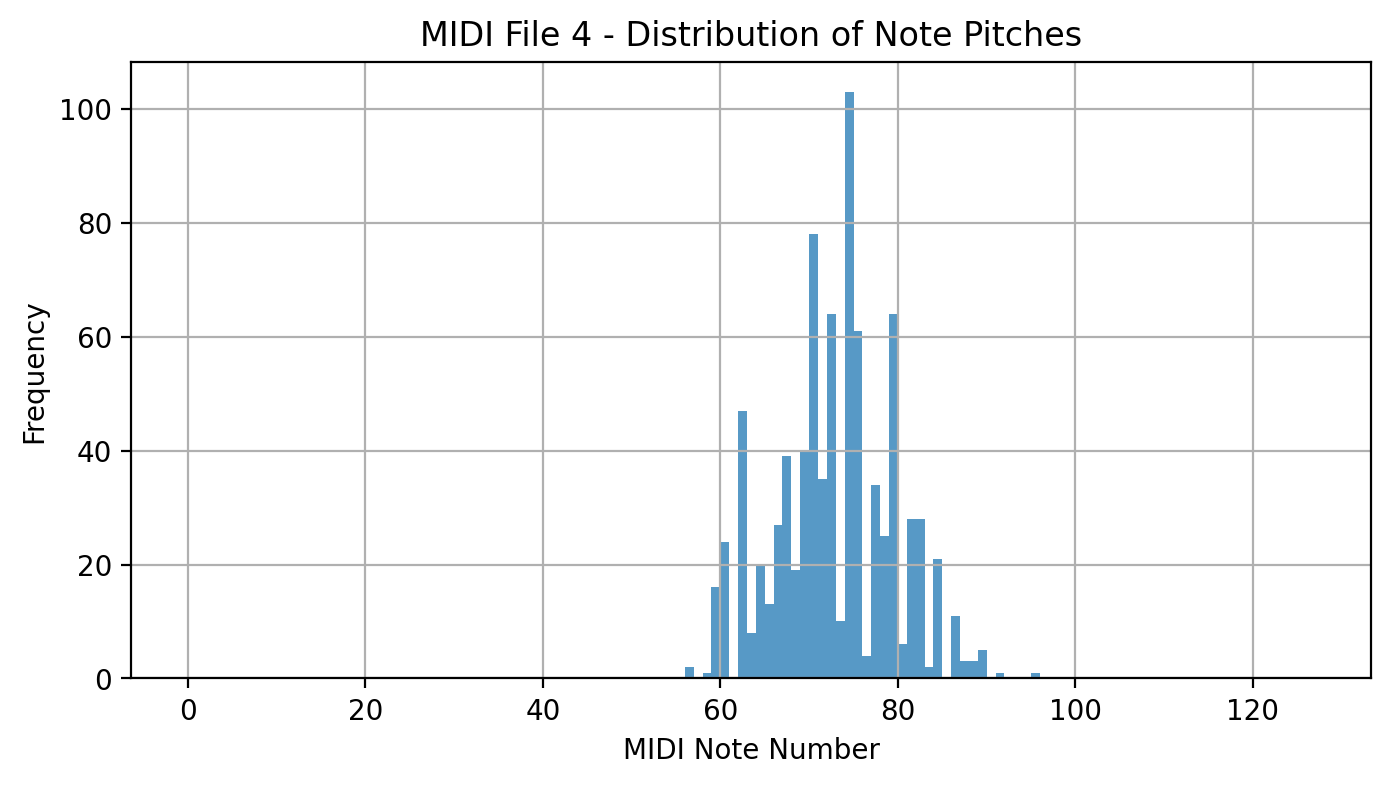

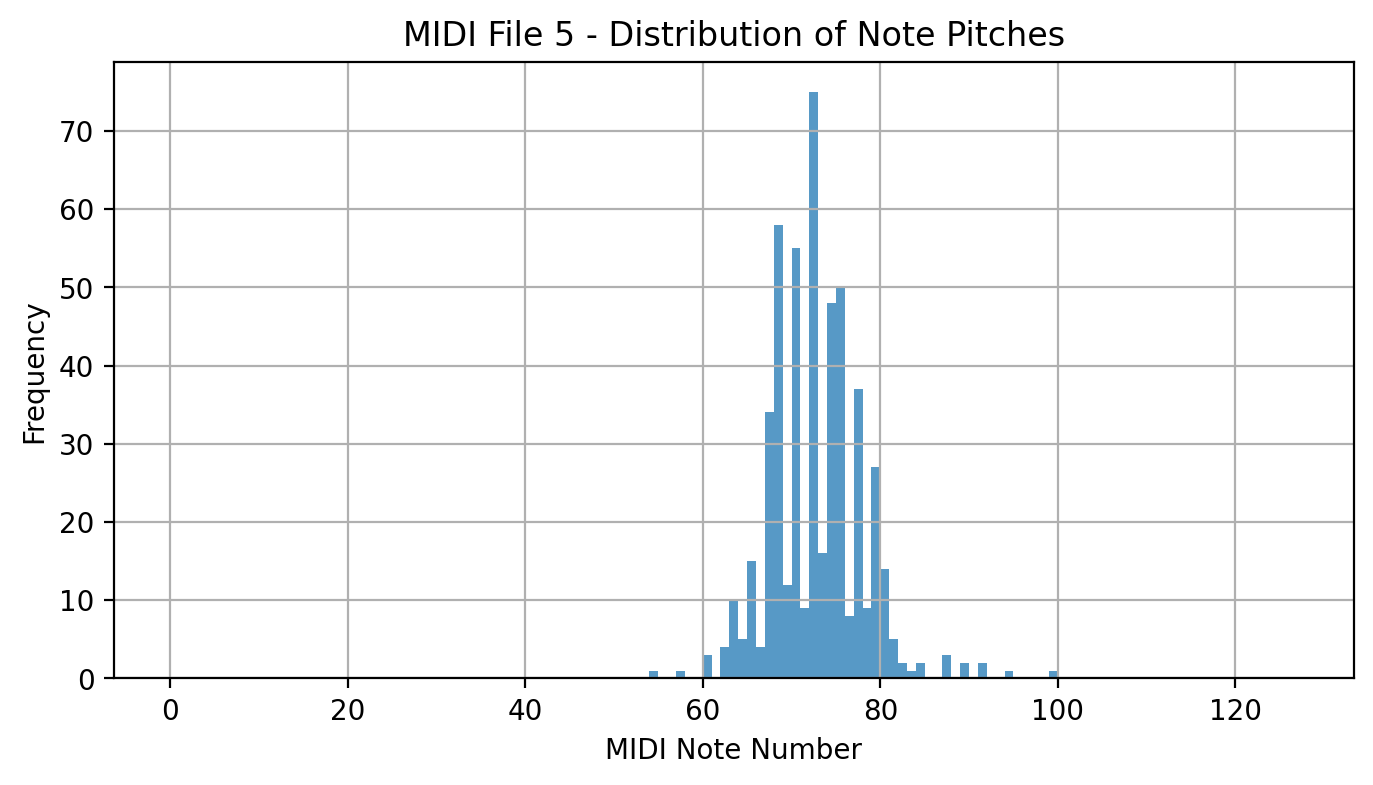

In [9]:
# Visualize the distribution of note pitches for each MIDI file
for i, midi_data in enumerate(loaded_midis):
    note_pitches = [note.pitch for note in midi_data.instruments[0].notes]
    plt.figure(figsize=(8, 4))
    plt.hist(note_pitches, bins=range(128), alpha=0.75)
    plt.title(f"MIDI File {i+1} - Distribution of Note Pitches")
    plt.xlabel("MIDI Note Number")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


In [4]:
import os
import pretty_midi

# Define the directory containing the MIDI clips
directory_path = r"E:\Piano Dataset\All clips togethter"

# Get all MIDI file paths in the directory
midi_file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(".mid")]

# List to store loaded MIDI objects
loaded_midis2 = []

# Load each MIDI file
for midi_file_path in midi_file_paths:
    try:
        midi_data = pretty_midi.PrettyMIDI(midi_file_path)
        loaded_midis2.append(midi_data)
        print("Loaded:", midi_file_path)
    except Exception as e:
        print("Error loading {}: {}".format(midi_file_path, e))


Loaded: E:\Piano Dataset\All clips togethter\alb_esp1.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_esp2.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_esp3.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_esp4.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_esp5.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_esp6.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_se1.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_se2.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_se3.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_se4.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_se5.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_se6.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_se7.mid
Loaded: E:\Piano Dataset\All clips togethter\alb_se8.mid
Loaded: E:\Piano Dataset\All clips togethter\appass_1.mid
Loaded: E:\Piano Dataset\All clips togethter\appass_2.mid
Loaded: E:\Piano Dataset\All clips togethter\appass_3.mid
Loaded: E:\Piano Datas

In [5]:
# Print the number of MIDI files loaded
print("Number of MIDI files loaded:", len(loaded_midis2))

Number of MIDI files loaded: 292


In [6]:
!pip install tensorflow

In [7]:
#Importing Libraries
import tensorflow 
import numpy as np 
import pandas as pd 
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

In [8]:
#Loading the list of all midi files as stream 
import os
from music21 import *
filepath="E:/Piano Dataset/All clips togethter/"
all_midis = []

for i in os.listdir(filepath):
    if i.endswith(".mid"):
        tr = os.path.join(filepath, i)
        try:
            midi = converter.parse(tr)
            all_midis.append(midi)
        except Exception as e:
            print(f"Error parsing {i}: {e}")

In [9]:
#Helping function        
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes
#Getting the list of notes as Corpus
Corpus= extract_notes(all_midis)
print("Total notes in all the midis in the dataset:", len(Corpus))

Total notes in all the midis in the dataset: 481397


In [10]:
print("First fifty values in the Corpus:", Corpus[:50])

First fifty values in the Corpus: ['A5', 'A3', 'E6', 'E4', 'E6', 'E4', '2.4', '2.4', 'D6', 'D4', 'C6', 'C4', 'D6', 'D4', 'E6', 'E4', 'F6', 'F4', 'G6', 'G4', 'E6', 'E4', 'F6', 'F4', 'E6', 'E4', '2.4', '2.4', 'D6', 'D4', 'C6', 'C4', 'B-5', 'B-3', 'A2', 'A3', 'E3', 'C#4', 'A3', 'E4', 'C#4', 'A4', 'E4', 'C#5', 'A4', 'E5', 'C#5', 'A4', 'C#4', 'C#5']


In [11]:
#Creating a count dictionary
count_num = Counter(Corpus)
print("Total unique notes in the Corpus:", len(count_num))

Total unique notes in the Corpus: 753


In [12]:
#Exploring the notes dictionary
Notes = list(count_num.keys())
Recurrence = list(count_num.values())
#Average recurrenc for a note in Corpus
def Average(lst):
    return sum(lst) / len(lst)
print("Average recurrenc for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

Average recurrenc for a note in Corpus: 639.3054448871181
Most frequent note in Corpus appeared: 10768 times
Least frequent note in Corpus appeared: 1 time


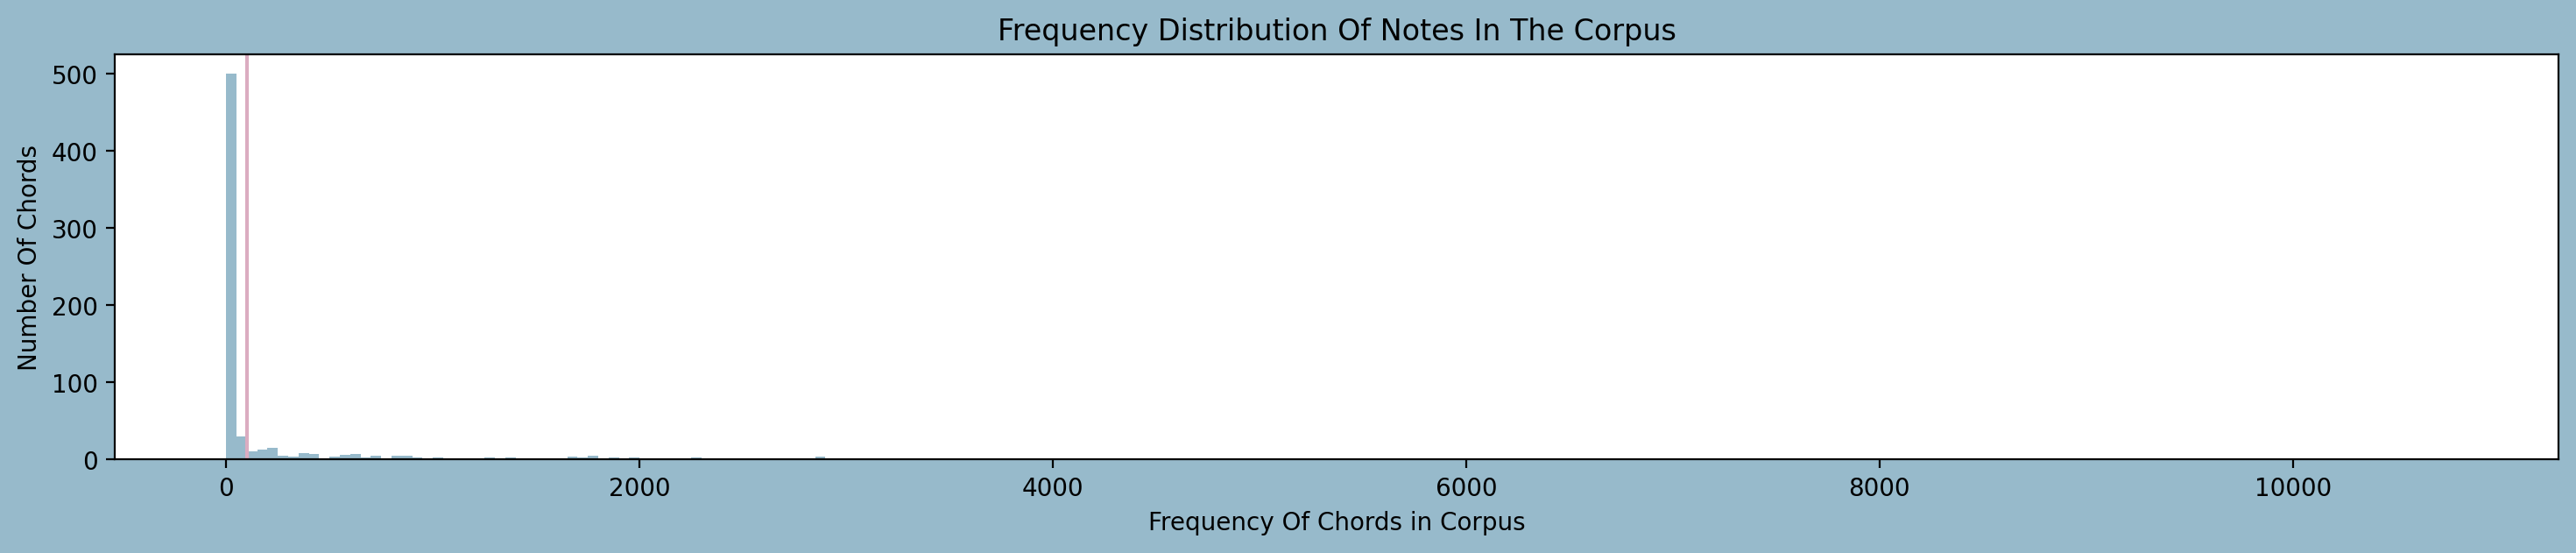

In [13]:
# Plotting the distribution of Notes
plt.figure(figsize=(18,3),facecolor="#97BACB")
bins = np.arange(0,(max(Recurrence)), 50) 
plt.hist(Recurrence, bins=bins, color="#97BACB")
plt.axvline(x=100,color="#DBACC1")
plt.title("Frequency Distribution Of Notes In The Corpus")
plt.xlabel("Frequency Of Chords in Corpus")
plt.ylabel("Number Of Chords")
plt.show()

In [13]:
#Getting a list of rare chords
rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 100:
        m =  key
        rare_note.append(m)
        
print("Total number of notes that occur less than 100 times:", len(rare_note))

Total number of notes that occur less than 100 times: 530


In [14]:
#Eleminating the rare notes
for element in Corpus:
    if element in rare_note:
        Corpus.remove(element)

print("Length of Corpus after elemination the rare notes:", len(Corpus))

Length of Corpus after elemination the rare notes: 475633


In [15]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 475633
Number of unique characters: 498


In [16]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 475593


In [17]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)
# one hot encode the output variable
y = tensorflow.keras.utils.to_categorical(targets) 

In [18]:
#Taking out a subset of data to be used as seed
X_train, X_seed, y_train, y_seed = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Initialising the Model
model = Sequential()
#Adding layers
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(256))
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [21]:
#Model's Summary               
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 512)           1052672   
                                                                 
 dropout (Dropout)           (None, 40, 512)           0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 498)               127986    
                                                                 
Total params: 2033906 (7.76 MB)
Trainable params: 203390

In [22]:
#Training the Model
history = model.fit(X_train, y_train, batch_size=256, epochs=80)

Epoch 1/80

1487/1487 [==============================] - 2630s 2s/step - loss: 4.8931
Epoch 2/80
1487/1487 [==============================] - 2506s 2s/step - loss: 4.7607
Epoch 3/80
1487/1487 [==============================] - 2767s 2s/step - loss: 4.6802
Epoch 4/80
1487/1487 [==============================] - 3057s 2s/step - loss: 4.6453
Epoch 5/80
1487/1487 [==============================] - 2396s 2s/step - loss: 4.5560
Epoch 6/80
1487/1487 [==============================] - 2392s 2s/step - loss: 4.4802
Epoch 7/80
1487/1487 [==============================] - 3324s 2s/step - loss: 4.4176
Epoch 8/80
1487/1487 [==============================] - 3229s 2s/step - loss: 4.3341
Epoch 9/80
1487/1487 [==============================] - 2301s 2s/step - loss: 4.2268
Epoch 10/80
1487/1487 [==============================] - 4050s 3s/step - loss: 4.1008
Epoch 11/80
1487/1487 [==============================] - 2432s 2s/step - loss: 3.9677
Epoch 12/80
1487/1487 [==============================] - 2464s

In [25]:
# Save the trained model
model.save('music_generation_model.h5')

In [24]:
# Save the trained model to the E:\Piano Dataset directory
model.save('E:/Piano Dataset/music_generation_model.h5')

[Text(0.5, 0, 'Epochs')]

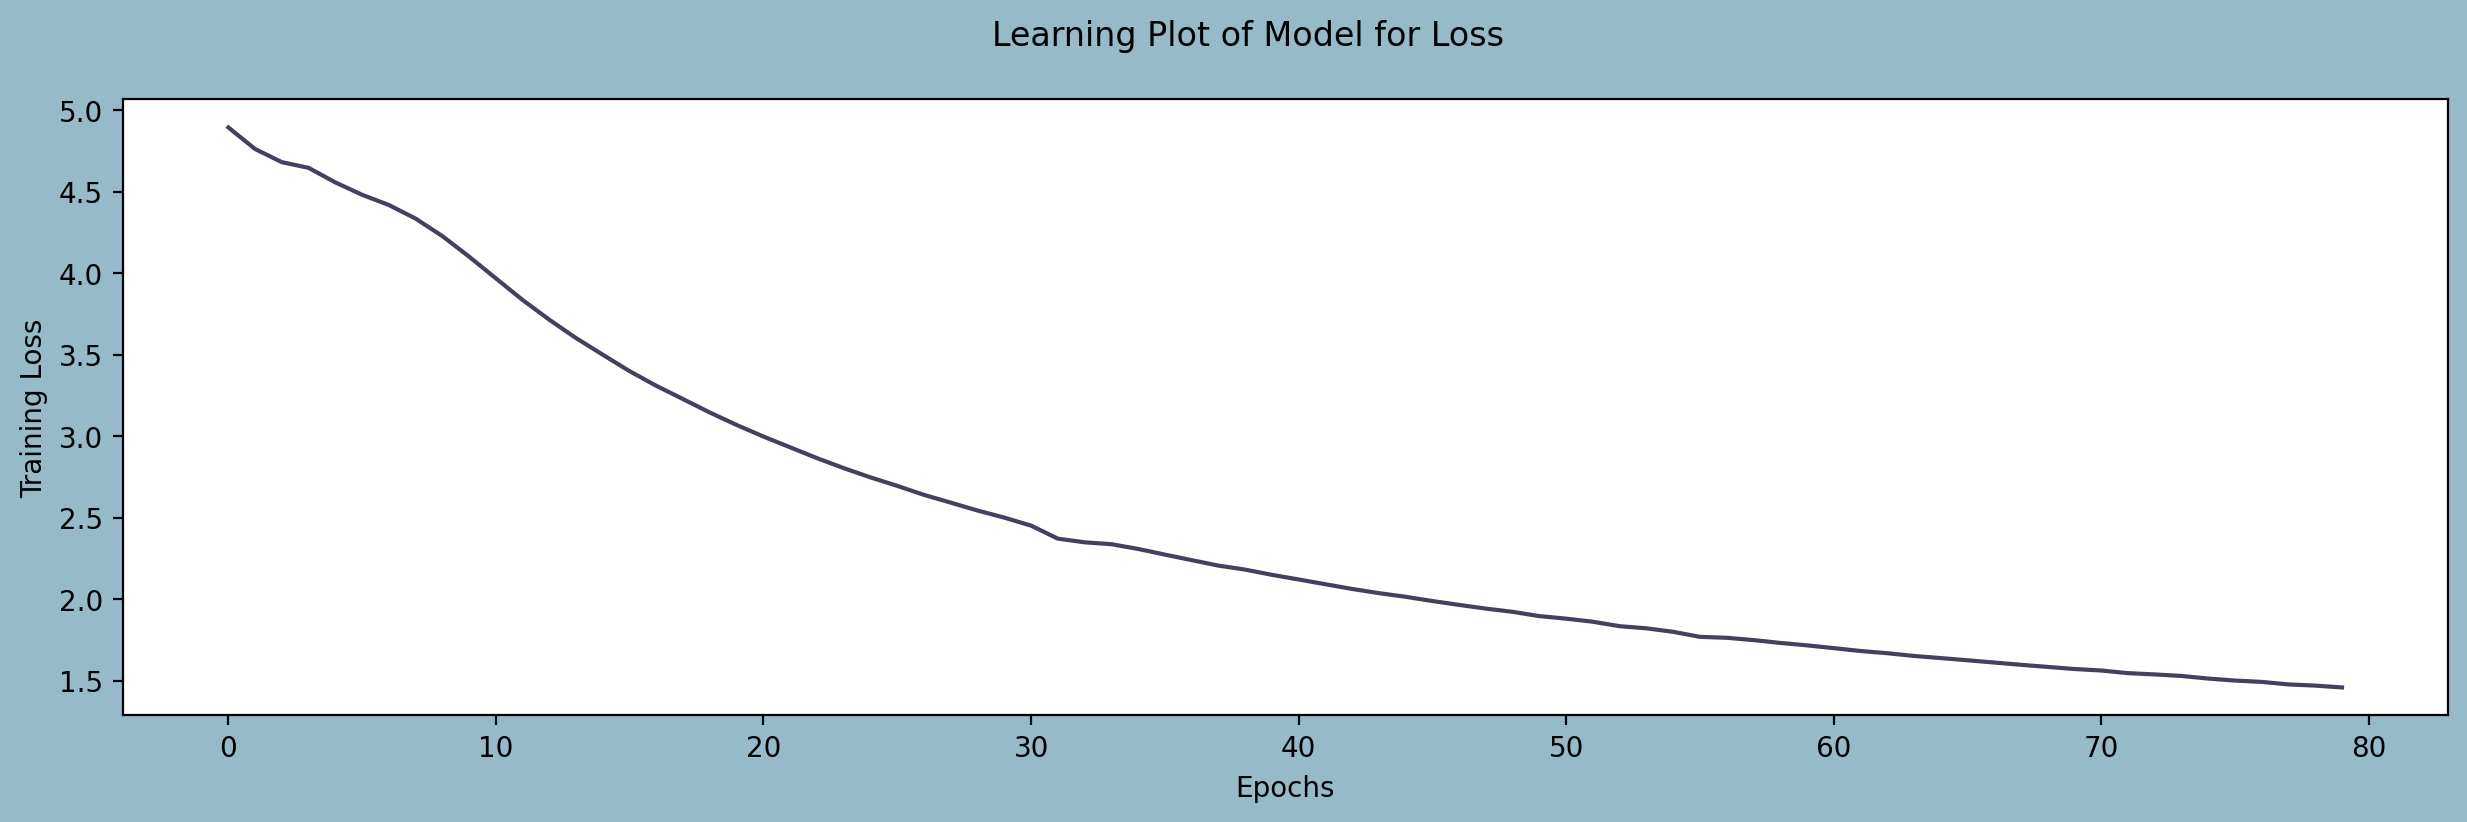

In [23]:
#Plotting the learnings 
history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4), facecolor="#97BACB")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [36]:
def chords_n_notes(Snippet):
    Melody = []
    offset = 0 #Incremental
    for i in Snippet:
        #If it is chord
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".") #Seperating the notes in chord
            notes = [] 
            for j in chord_notes:
                inst_note=int(j)
                note_snip = note.Note(inst_note)            
                notes.append(note_snip)
                chord_snip = chord.Chord(notes)
                chord_snip.offset = offset
                Melody.append(chord_snip)
        # pattern is a note
        else: 
            note_snip = note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
        # increase offset each iteration so that notes do not stack
        offset += 1
    Melody_midi = stream.Stream(Melody)   
    return Melody_midi

In [37]:
def Malody_Generator(Note_Count):
    seed = X_seed[np.random.randint(0,len(X_seed)-1)]
    Music = ""
    Notes_Generated=[]
    for i in range(Note_Count):
        seed = seed.reshape(1,length,1)
        prediction = model.predict(seed, verbose=0)[0]
        prediction = np.log(prediction) / 1.0 #diversity
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        index = np.argmax(prediction)
        index_N = index/ float(L_symb)   
        Notes_Generated.append(index)
        Music = [reverse_mapping[char] for char in Notes_Generated]
        seed = np.insert(seed[0],len(seed[0]),index_N)
        seed = seed[1:]
    #Now, we have music in form or a list of chords and notes and we want to be a midi file.
    Melody = chords_n_notes(Music)
    Melody_midi = stream.Stream(Melody)   
    return Music,Melody_midi


#getting the Notes and Melody created by the model
Music_notes, Melody = Malody_Generator(50)

In [31]:
#Sample
import os

# Define the folder path to save the generated MIDI files
output_folder = "E:/Piano Dataset/LSTM_Generated_music"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Run the Melody_Generator function 5 times
for i in range(5):
    # Generate melody
    Music_notes, Melody = Malody_Generator(100)
    
    # Define the file name for the generated MIDI file
    file_name = f"generated_music_{i+1}.mid"
    
    # Save the generated melody as a MIDI file
    output_path = os.path.join(output_folder, file_name)
    Melody.write('midi', fp=output_path)
    
    print(f"Generated music saved as {file_name}")


Generated music saved as generated_music_1.mid
Generated music saved as generated_music_2.mid
Generated music saved as generated_music_3.mid
Generated music saved as generated_music_4.mid
Generated music saved as generated_music_5.mid


In [39]:
import os

# Define the folder path to save the generated MIDI files
output_folder = "E:/Piano Dataset/LSTM_Generated_music_real"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
# Run the Melody_Generator function 100 times
for i in range(200):
    # Generate melody
    Music_notes, Melody = Malody_Generator(200)
    
    # Define the file name for the generated MIDI file
    file_name = f"generated_music_{i+1}.mid"
    
    # Save the generated melody as a MIDI file
    output_path = os.path.join(output_folder, file_name)
    Melody.write('midi', fp=output_path)
    
    print(f"Generated music saved as {file_name}")


Generated music saved as generated_music_1.mid
Generated music saved as generated_music_2.mid
Generated music saved as generated_music_3.mid
Generated music saved as generated_music_4.mid
Generated music saved as generated_music_5.mid
Generated music saved as generated_music_6.mid
Generated music saved as generated_music_7.mid
Generated music saved as generated_music_8.mid
Generated music saved as generated_music_9.mid
Generated music saved as generated_music_10.mid
Generated music saved as generated_music_11.mid
Generated music saved as generated_music_12.mid
Generated music saved as generated_music_13.mid
Generated music saved as generated_music_14.mid
Generated music saved as generated_music_15.mid
Generated music saved as generated_music_16.mid
Generated music saved as generated_music_17.mid
Generated music saved as generated_music_18.mid
Generated music saved as generated_music_19.mid
Generated music saved as generated_music_20.mid
Generated music saved as generated_music_21.mid
G

In [30]:
import os
import random
import warnings
from music21 import midi, environment

# Disable warnings
warnings.filterwarnings("ignore", category=UserWarning, module="music21.*")

# Set the directory containing the MIDI files
directory = r'E:\Piano Dataset\LSTM_Generated_music_real'

# Function to play a MIDI file
def play_midi(midi_file):
    mf = midi.MidiFile()
    mf.open(midi_file)
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    s.show('midi')

# List all MIDI files in the directory
midi_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.mid')]

# Randomly select 3 MIDI files
selected_files = random.sample(midi_files, 3)

# Play each selected MIDI file with controls
for i, midi_file in enumerate(selected_files):
    print(f"Playing MIDI file {i+1}: {midi_file}")
    play_midi(midi_file)


Playing MIDI file 1: E:\Piano Dataset\LSTM_Generated_music_real\generated_music_112.mid


Playing MIDI file 2: E:\Piano Dataset\LSTM_Generated_music_real\generated_music_143.mid


Playing MIDI file 3: E:\Piano Dataset\LSTM_Generated_music_real\generated_music_23.mid


In [2]:
from music21 import converter
import numpy as np
import glob

# Path to the folder containing generated MIDI files
folder_path = "E:/Piano Dataset/LSTM_Generated_music_real"

# List all MIDI files in the folder
midi_files = glob.glob(folder_path + "/*.mid")

# Aggregate metrics
total_note_diversity = 0
aggregate_pitch_histogram = np.zeros(128)  # 128 MIDI pitches

# Process each MIDI file
for file_path in midi_files:
    generated_score = converter.parse(file_path)
    
    # Calculate note diversity for each file and aggregate
    unique_notes = set()
    for element in generated_score.recurse():
        if 'Note' in element.classes:
            unique_notes.add(element.pitch.midi)
    total_note_diversity += len(unique_notes)
    
    # Calculate pitch histogram for each file and aggregate
    for element in generated_score.recurse():
        if 'Note' in element.classes:
            aggregate_pitch_histogram[element.pitch.midi] += 1

# Compute average note diversity
average_note_diversity = total_note_diversity / len(midi_files)

# Normalize aggregate pitch histogram
aggregate_pitch_histogram /= len(midi_files)

print("Average Note Diversity:", average_note_diversity)
print("Aggregate Pitch Histogram:", aggregate_pitch_histogram)


Average Note Diversity: 19.25
Aggregate Pitch Histogram: [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.015 0.015 0.045 2.    0.135 0.875 0.09
 0.165 0.285 0.26  0.275 0.19  0.775 0.17  0.735 1.18  1.37  1.97  1.63
 1.145 0.56  0.81  1.87  0.605 1.745 0.59  1.53  1.905 1.87  2.98  1.475
 3.855 2.385 2.645 1.76  2.505 4.28  1.225 2.655 1.87  2.785 2.69  2.865
 1.945 1.855 1.87  0.985 1.76  2.275 0.505 0.76  0.67  1.295 0.515 0.49
 1.    0.465 0.235 0.745 0.275 0.58  0.055 0.125 0.125 0.055 0.075 0.03
 0.005 0.015 0.015 0.48  0.015 0.01  0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]


In [5]:
import os
import pretty_midi

directory_path = r"E:\Piano Dataset\LSTM_Generated_music_real"
midi_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(".mid")]

# Load a few MIDI files
num_files_to_load = 5
loaded_midis = []
for midi_file in midi_files[:num_files_to_load]:
    try:
        midi_data = pretty_midi.PrettyMIDI(midi_file)
        loaded_midis.append(midi_data)
        print("Loaded:", midi_file)
    except Exception as e:
        print("Error loading {}: {}".format(midi_file, e))


Loaded: E:\Piano Dataset\LSTM_Generated_music_real\generated_music_1.mid
Loaded: E:\Piano Dataset\LSTM_Generated_music_real\generated_music_10.mid
Loaded: E:\Piano Dataset\LSTM_Generated_music_real\generated_music_100.mid
Loaded: E:\Piano Dataset\LSTM_Generated_music_real\generated_music_101.mid
Loaded: E:\Piano Dataset\LSTM_Generated_music_real\generated_music_102.mid


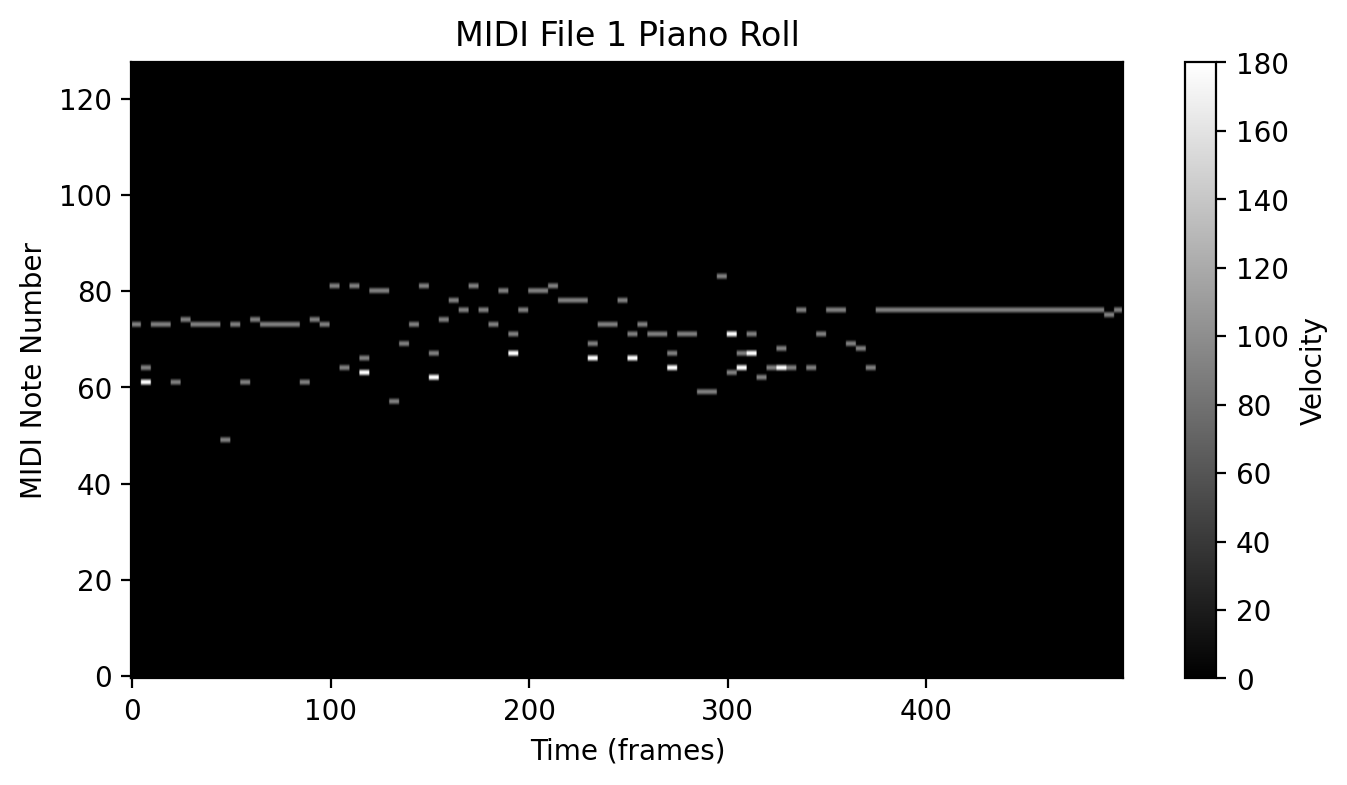

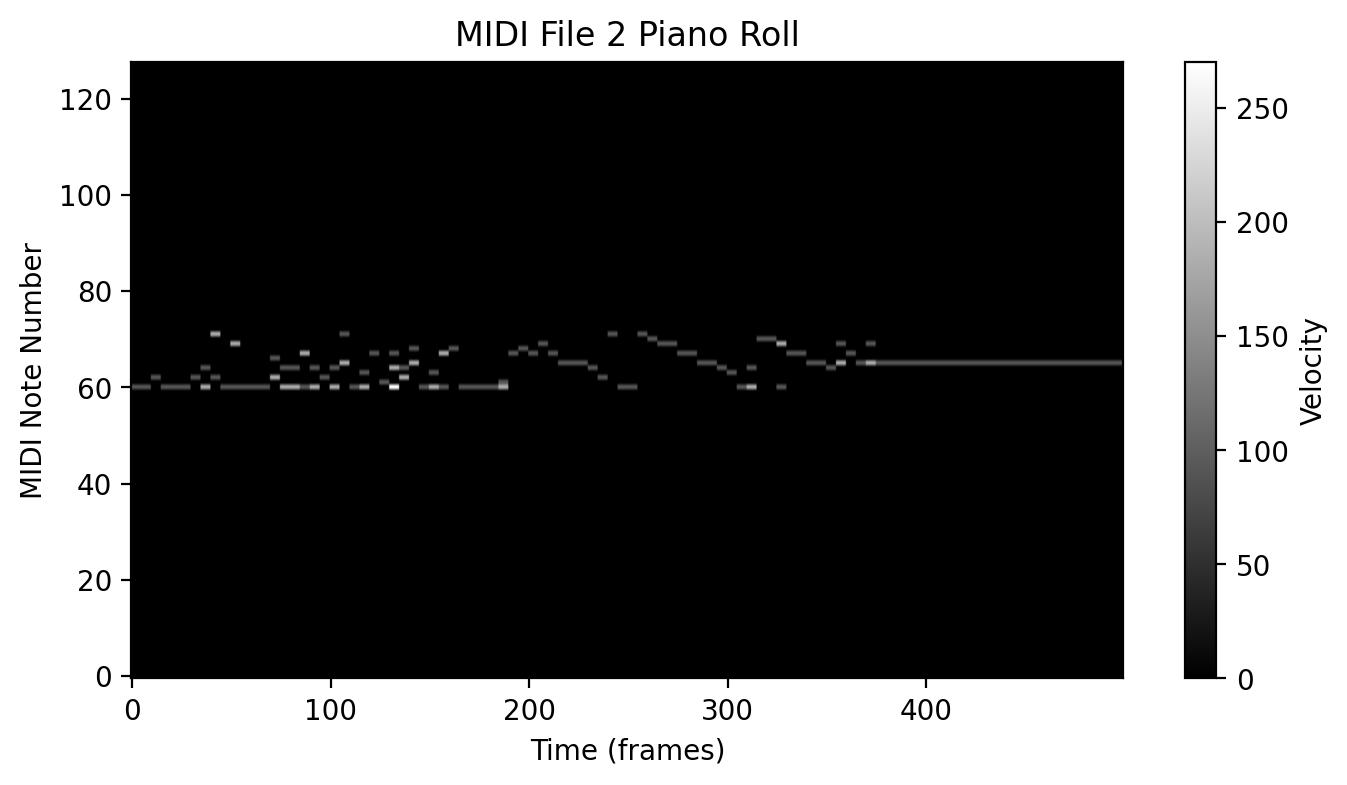

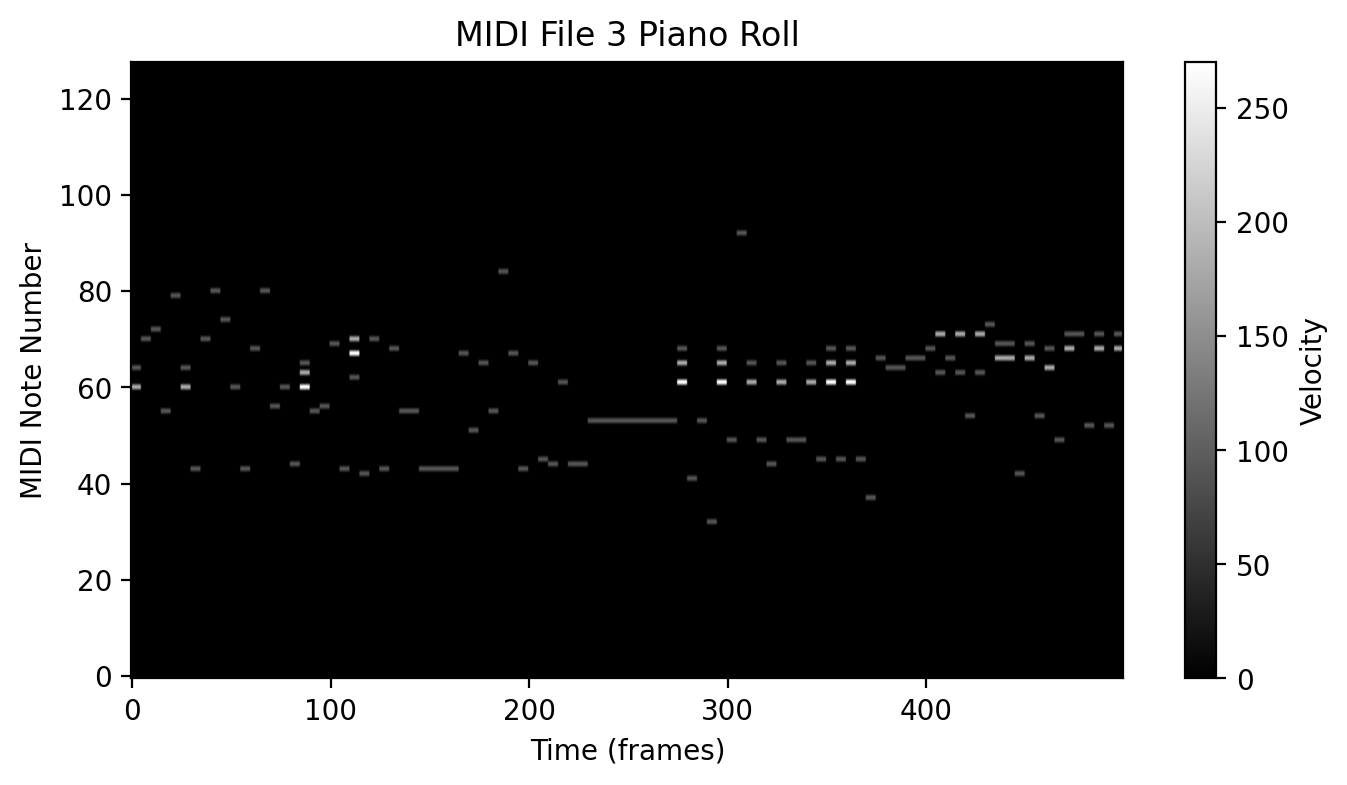

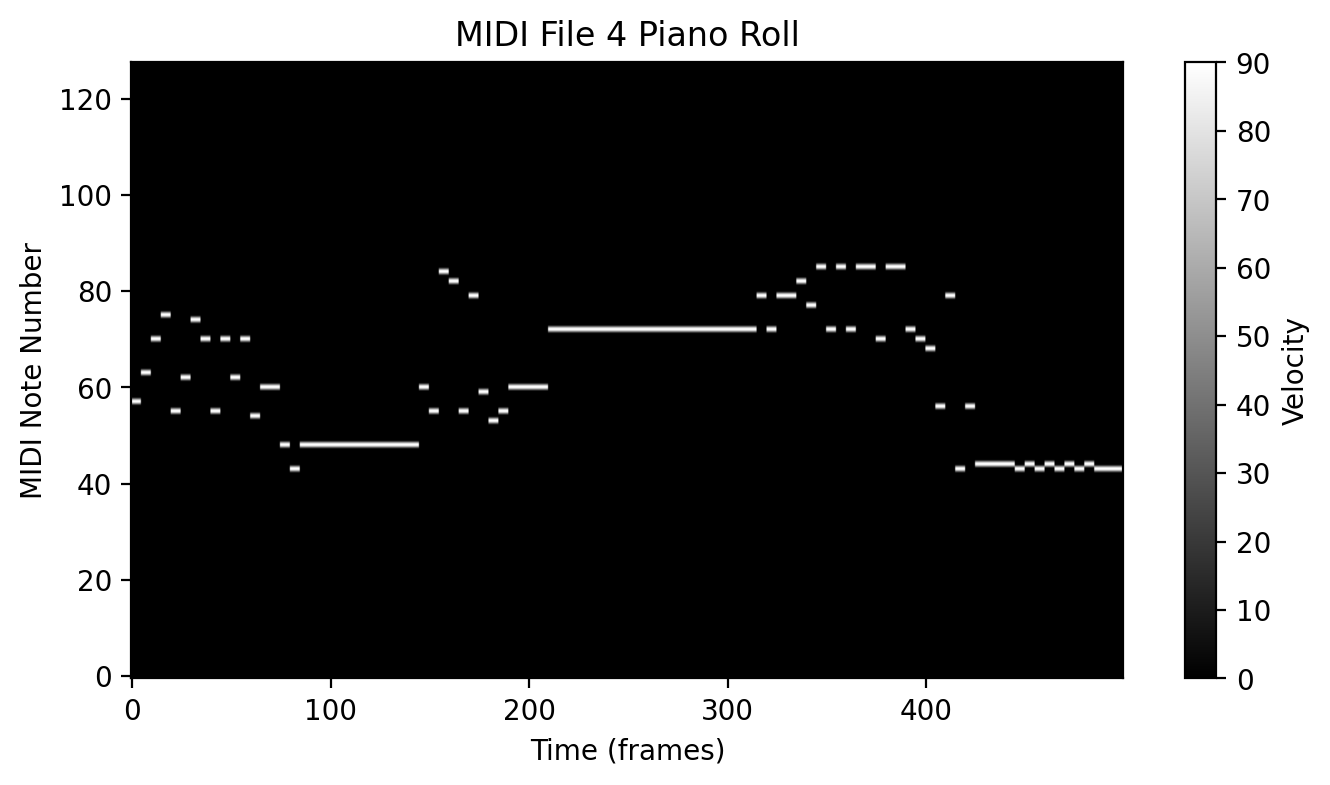

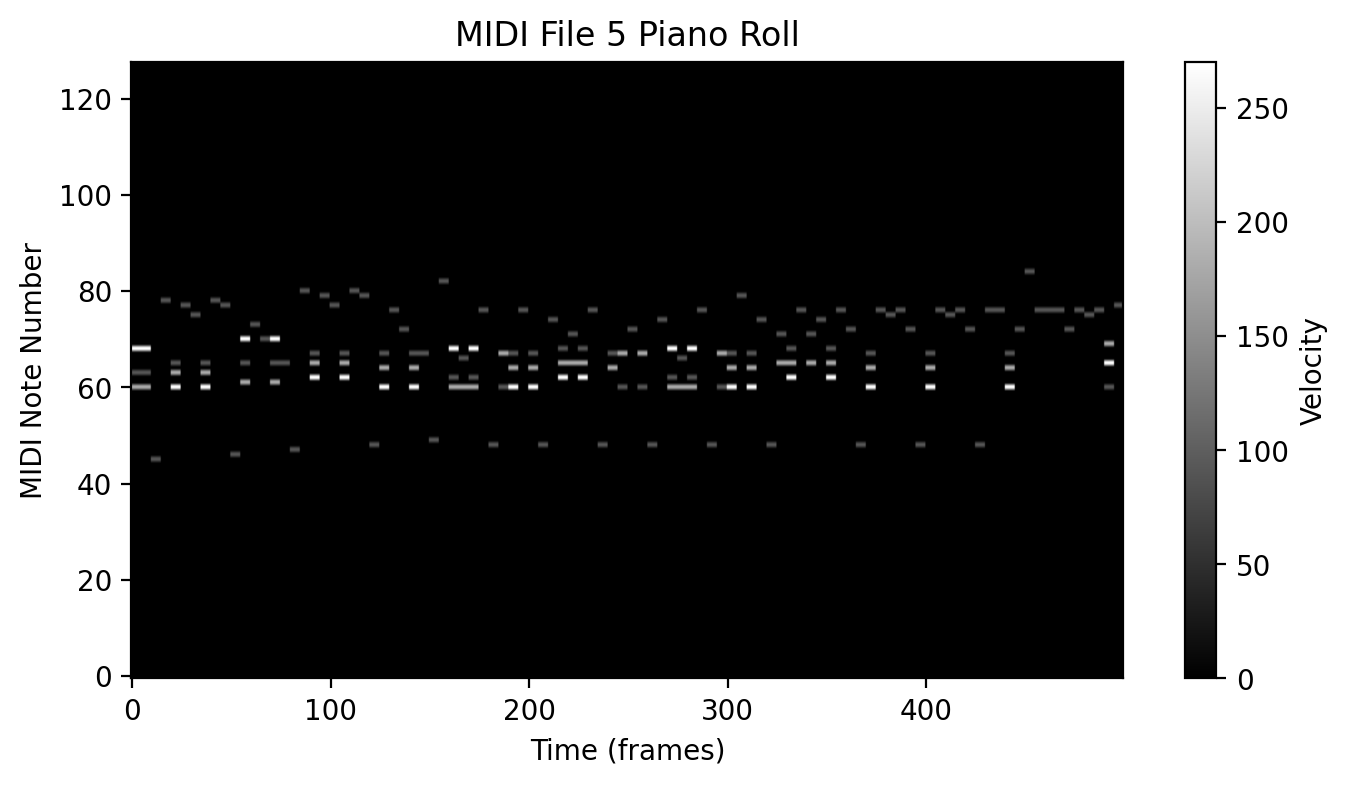

In [6]:
import matplotlib.pyplot as plt

# Visualize piano rolls for the loaded MIDI files
for i, midi_data in enumerate(loaded_midis):
    piano_roll = midi_data.get_piano_roll(fs=10)
    plt.figure(figsize=(8, 4))
    plt.imshow(piano_roll, origin="lower", aspect="auto", cmap="gray")
    plt.title(f"MIDI File {i+1} Piano Roll")
    plt.xlabel("Time (frames)")
    plt.ylabel("MIDI Note Number")
    plt.colorbar(label="Velocity")
    plt.show()

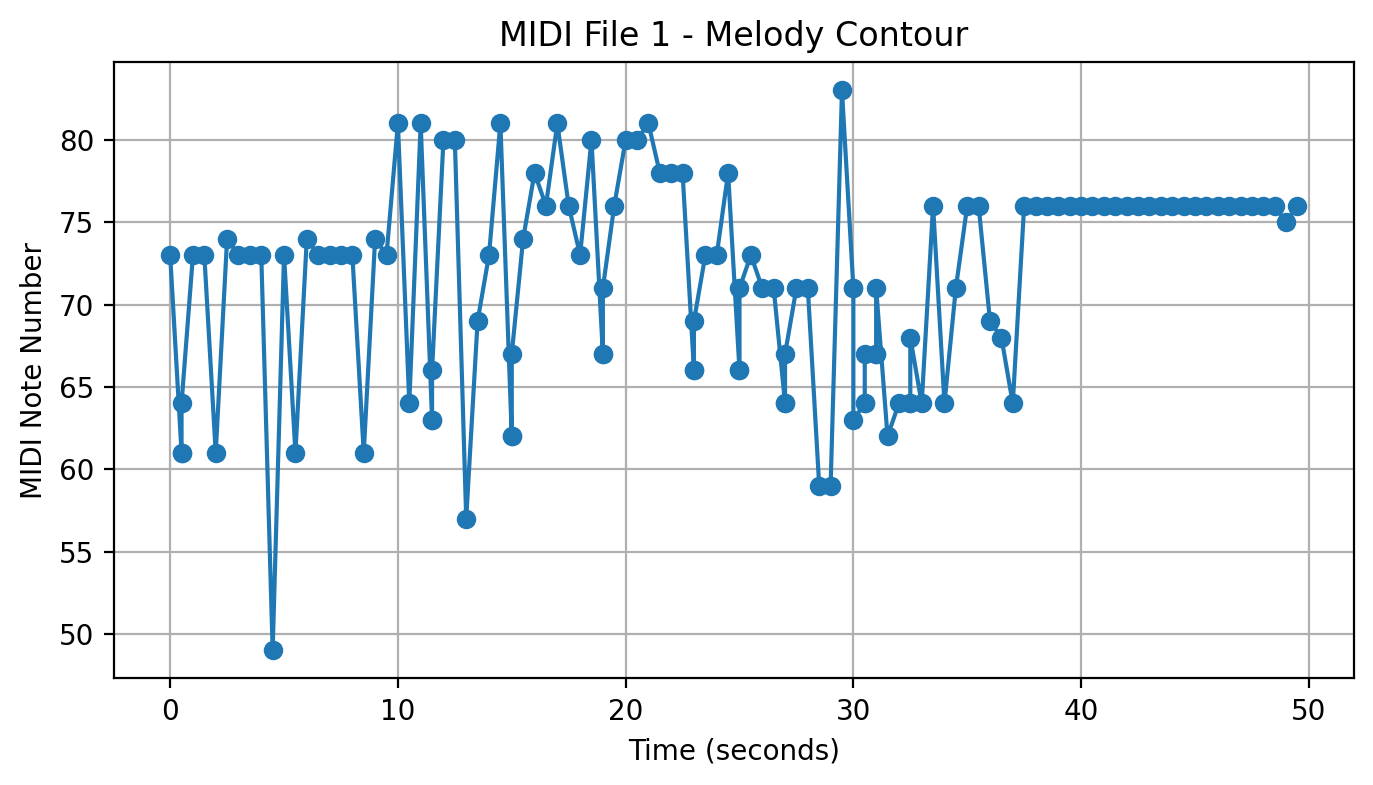

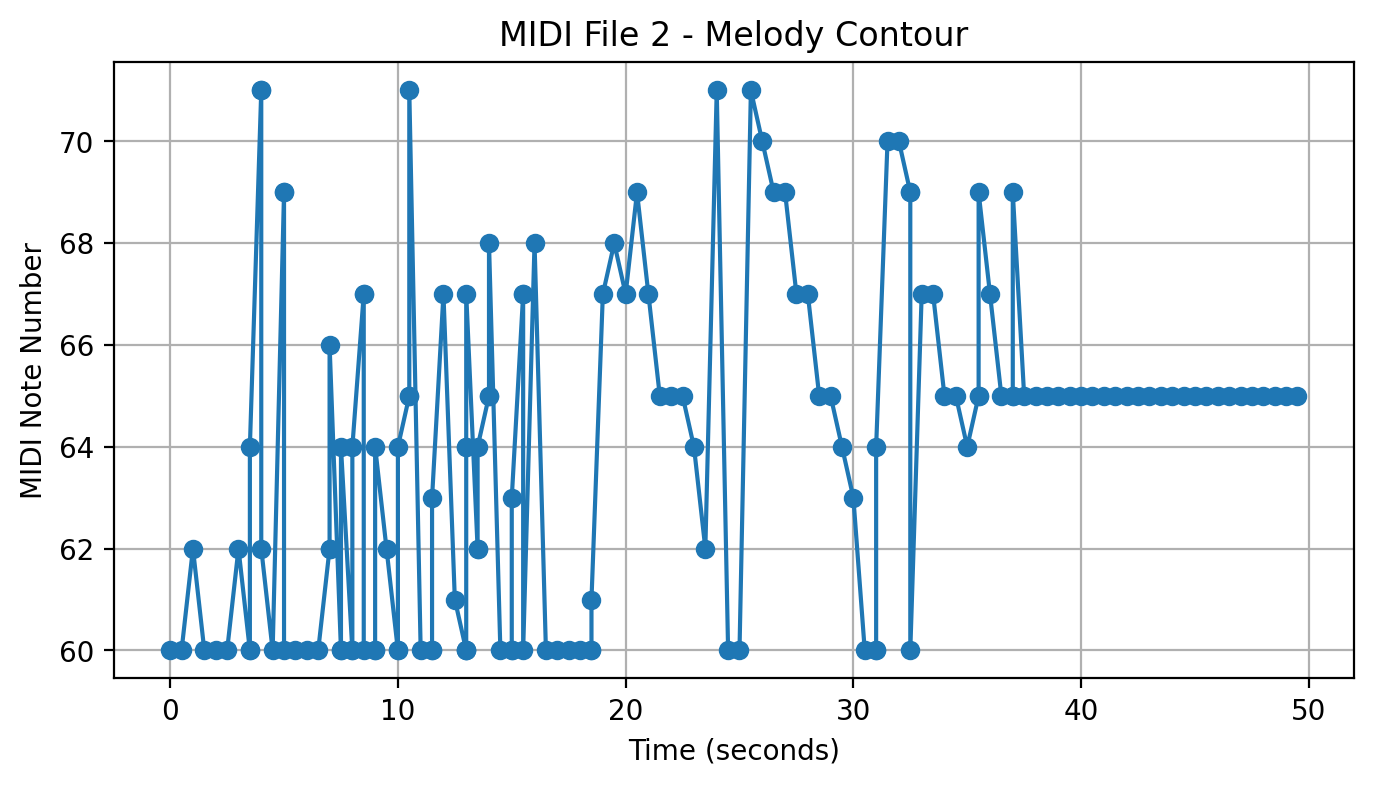

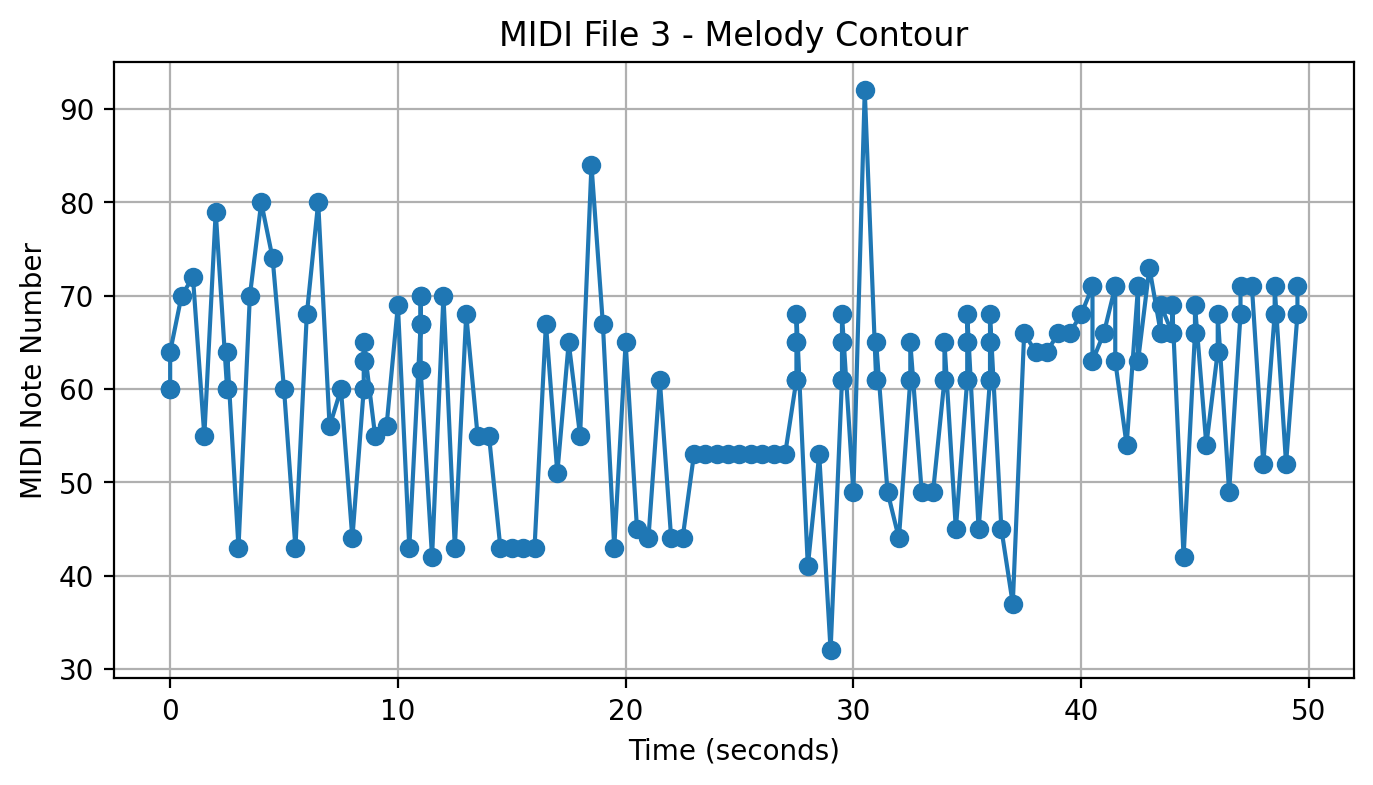

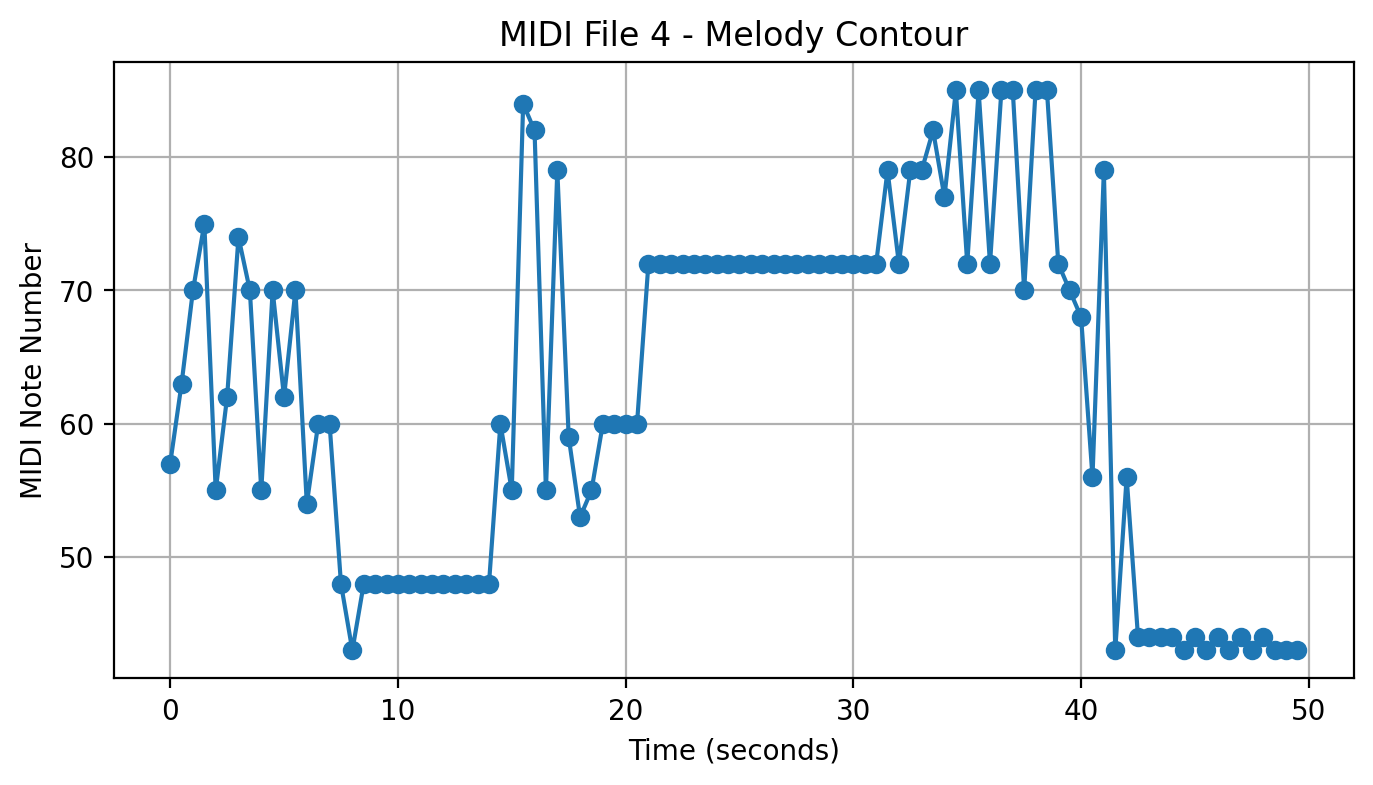

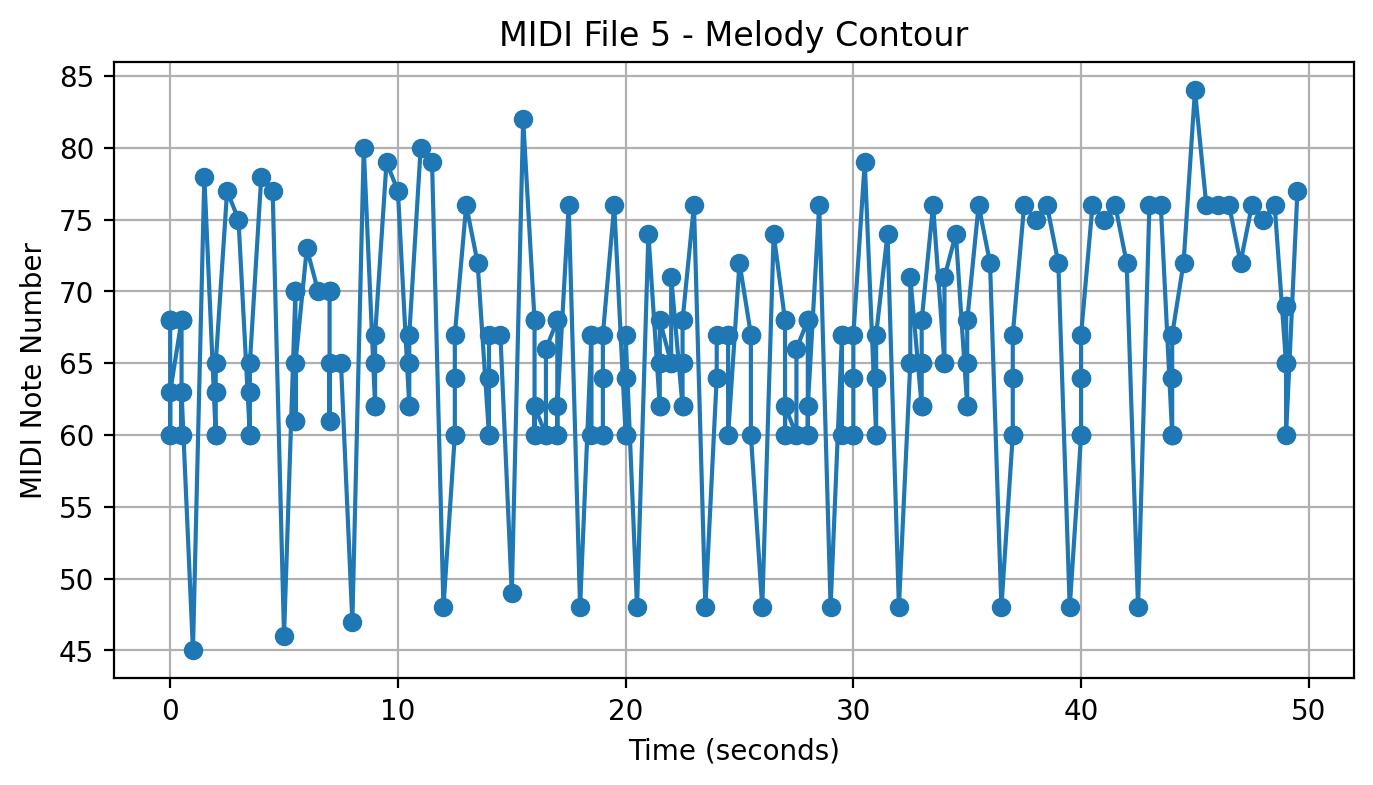

In [10]:
# Plot the melody contour for each MIDI file
for i, midi_data in enumerate(loaded_midis):
    note_onsets = [note.start for note in midi_data.instruments[0].notes]
    note_pitches = [note.pitch for note in midi_data.instruments[0].notes]
    plt.figure(figsize=(8, 4))
    plt.plot(note_onsets, note_pitches, marker='o', linestyle='-')
    plt.title(f"MIDI File {i+1} - Melody Contour")
    plt.xlabel("Time (seconds)")
    plt.ylabel("MIDI Note Number")
    plt.grid(True)
    plt.show()


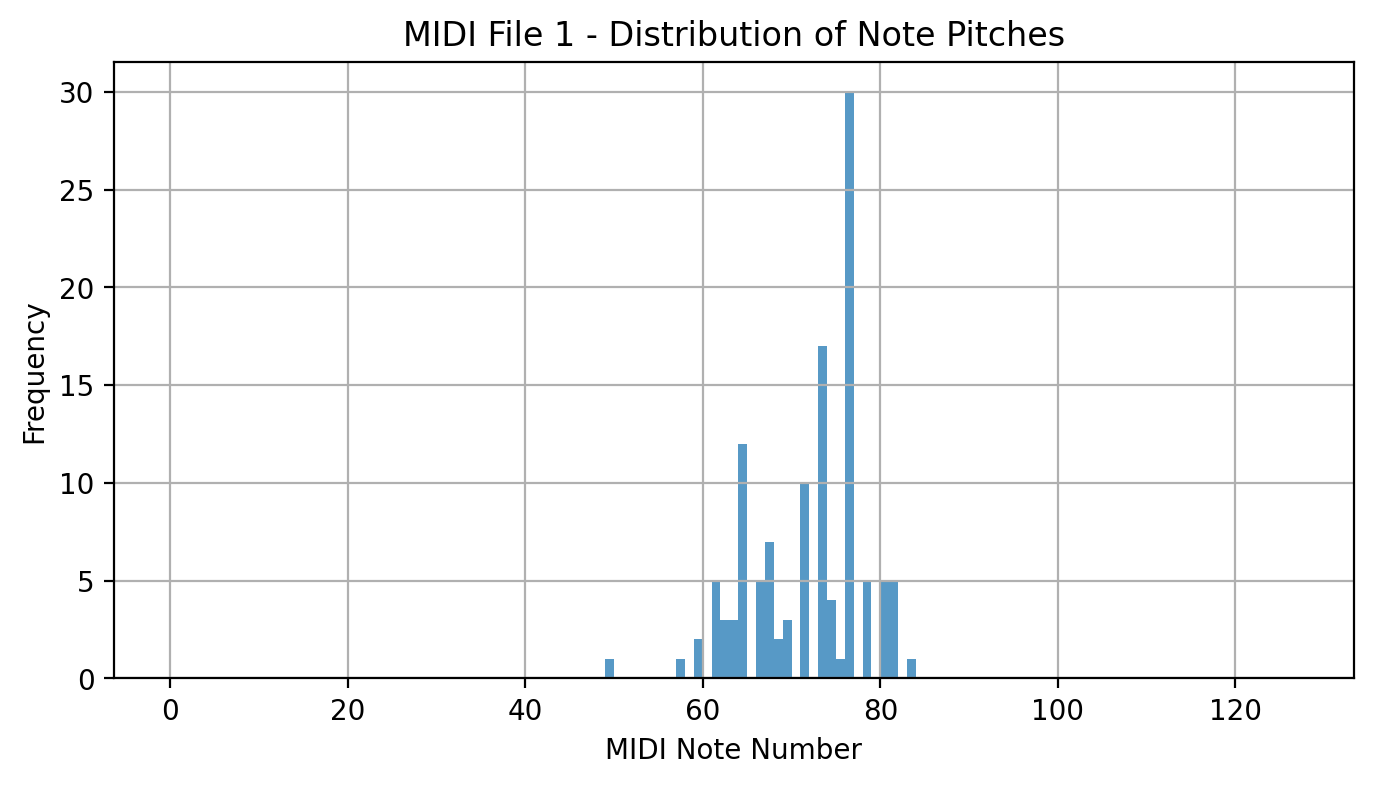

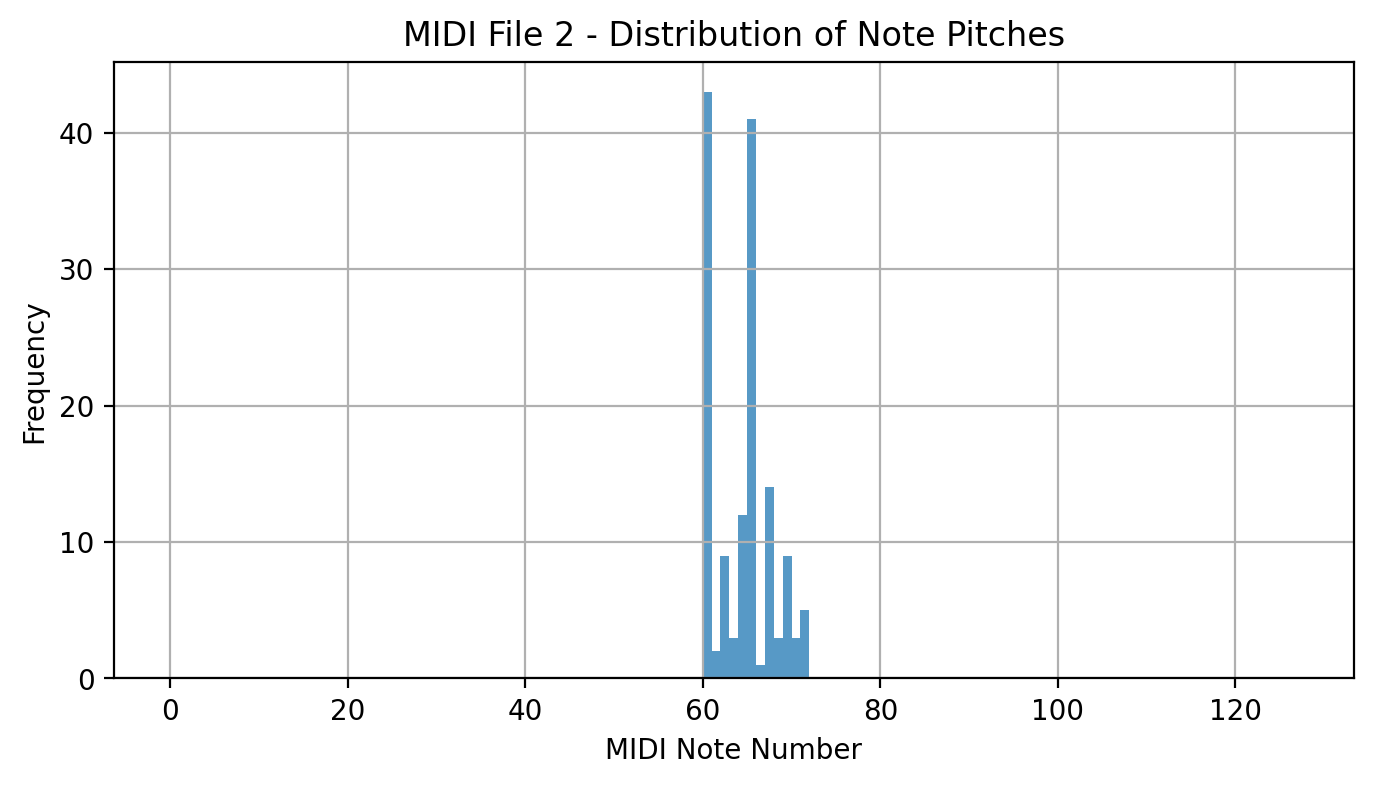

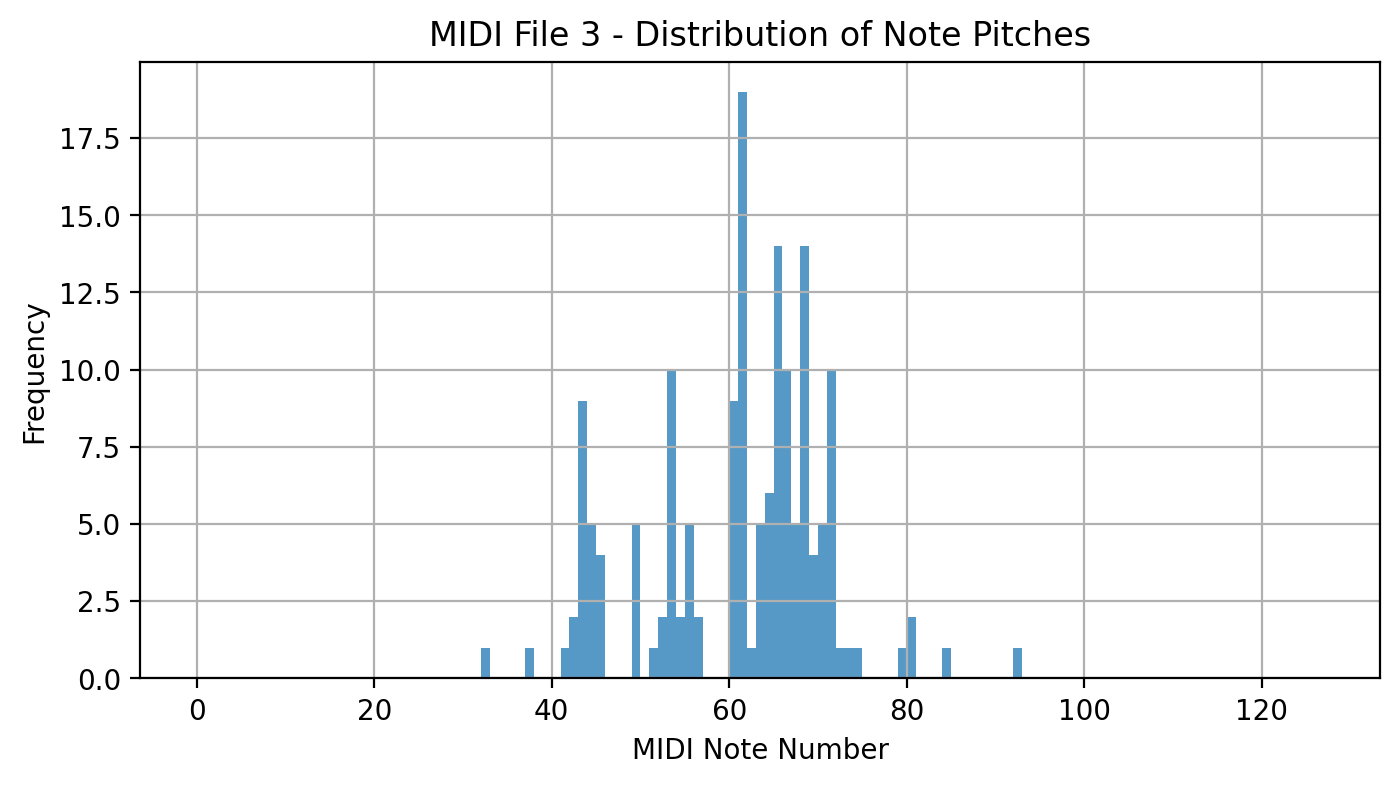

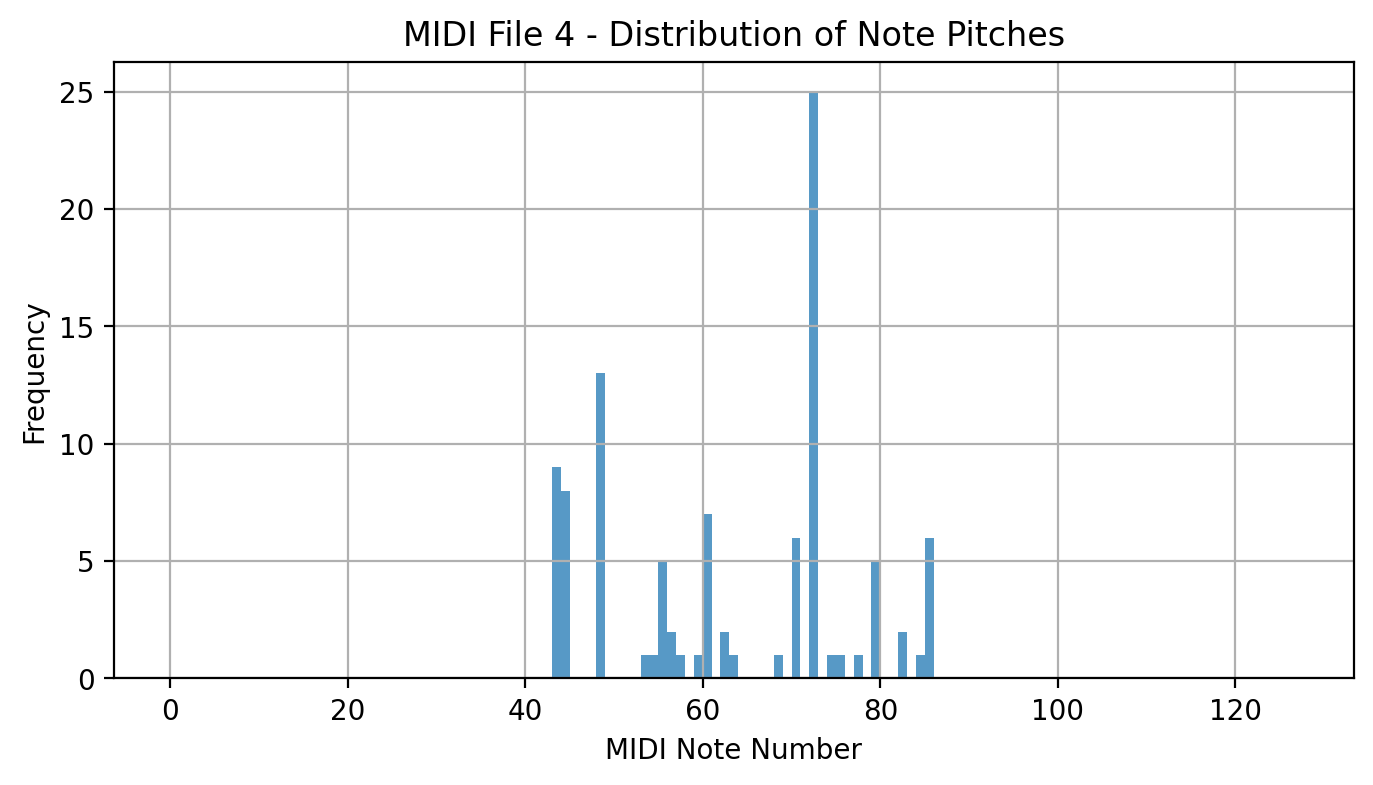

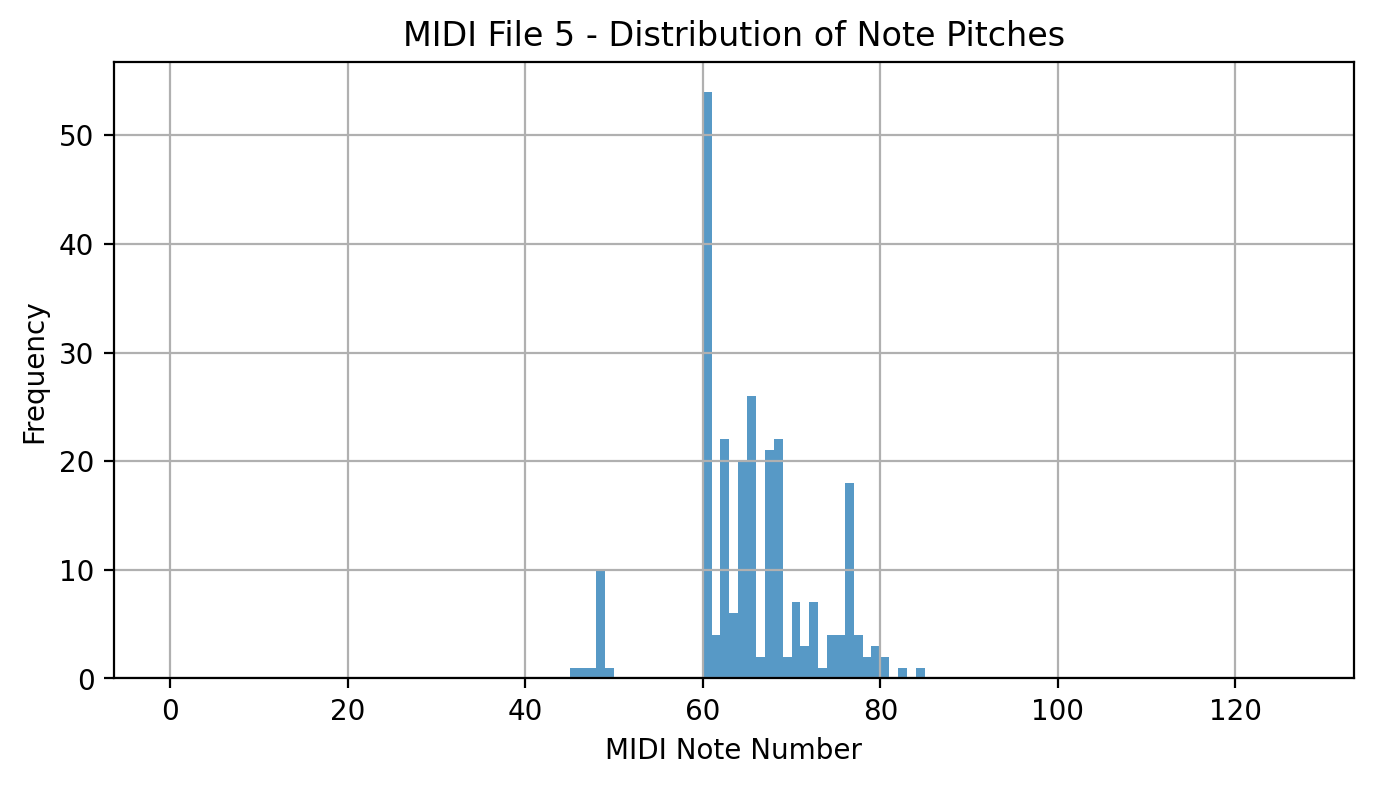

In [11]:
# Visualize the distribution of note pitches for each MIDI file
for i, midi_data in enumerate(loaded_midis):
    note_pitches = [note.pitch for note in midi_data.instruments[0].notes]
    plt.figure(figsize=(8, 4))
    plt.hist(note_pitches, bins=range(128), alpha=0.75)
    plt.title(f"MIDI File {i+1} - Distribution of Note Pitches")
    plt.xlabel("MIDI Note Number")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

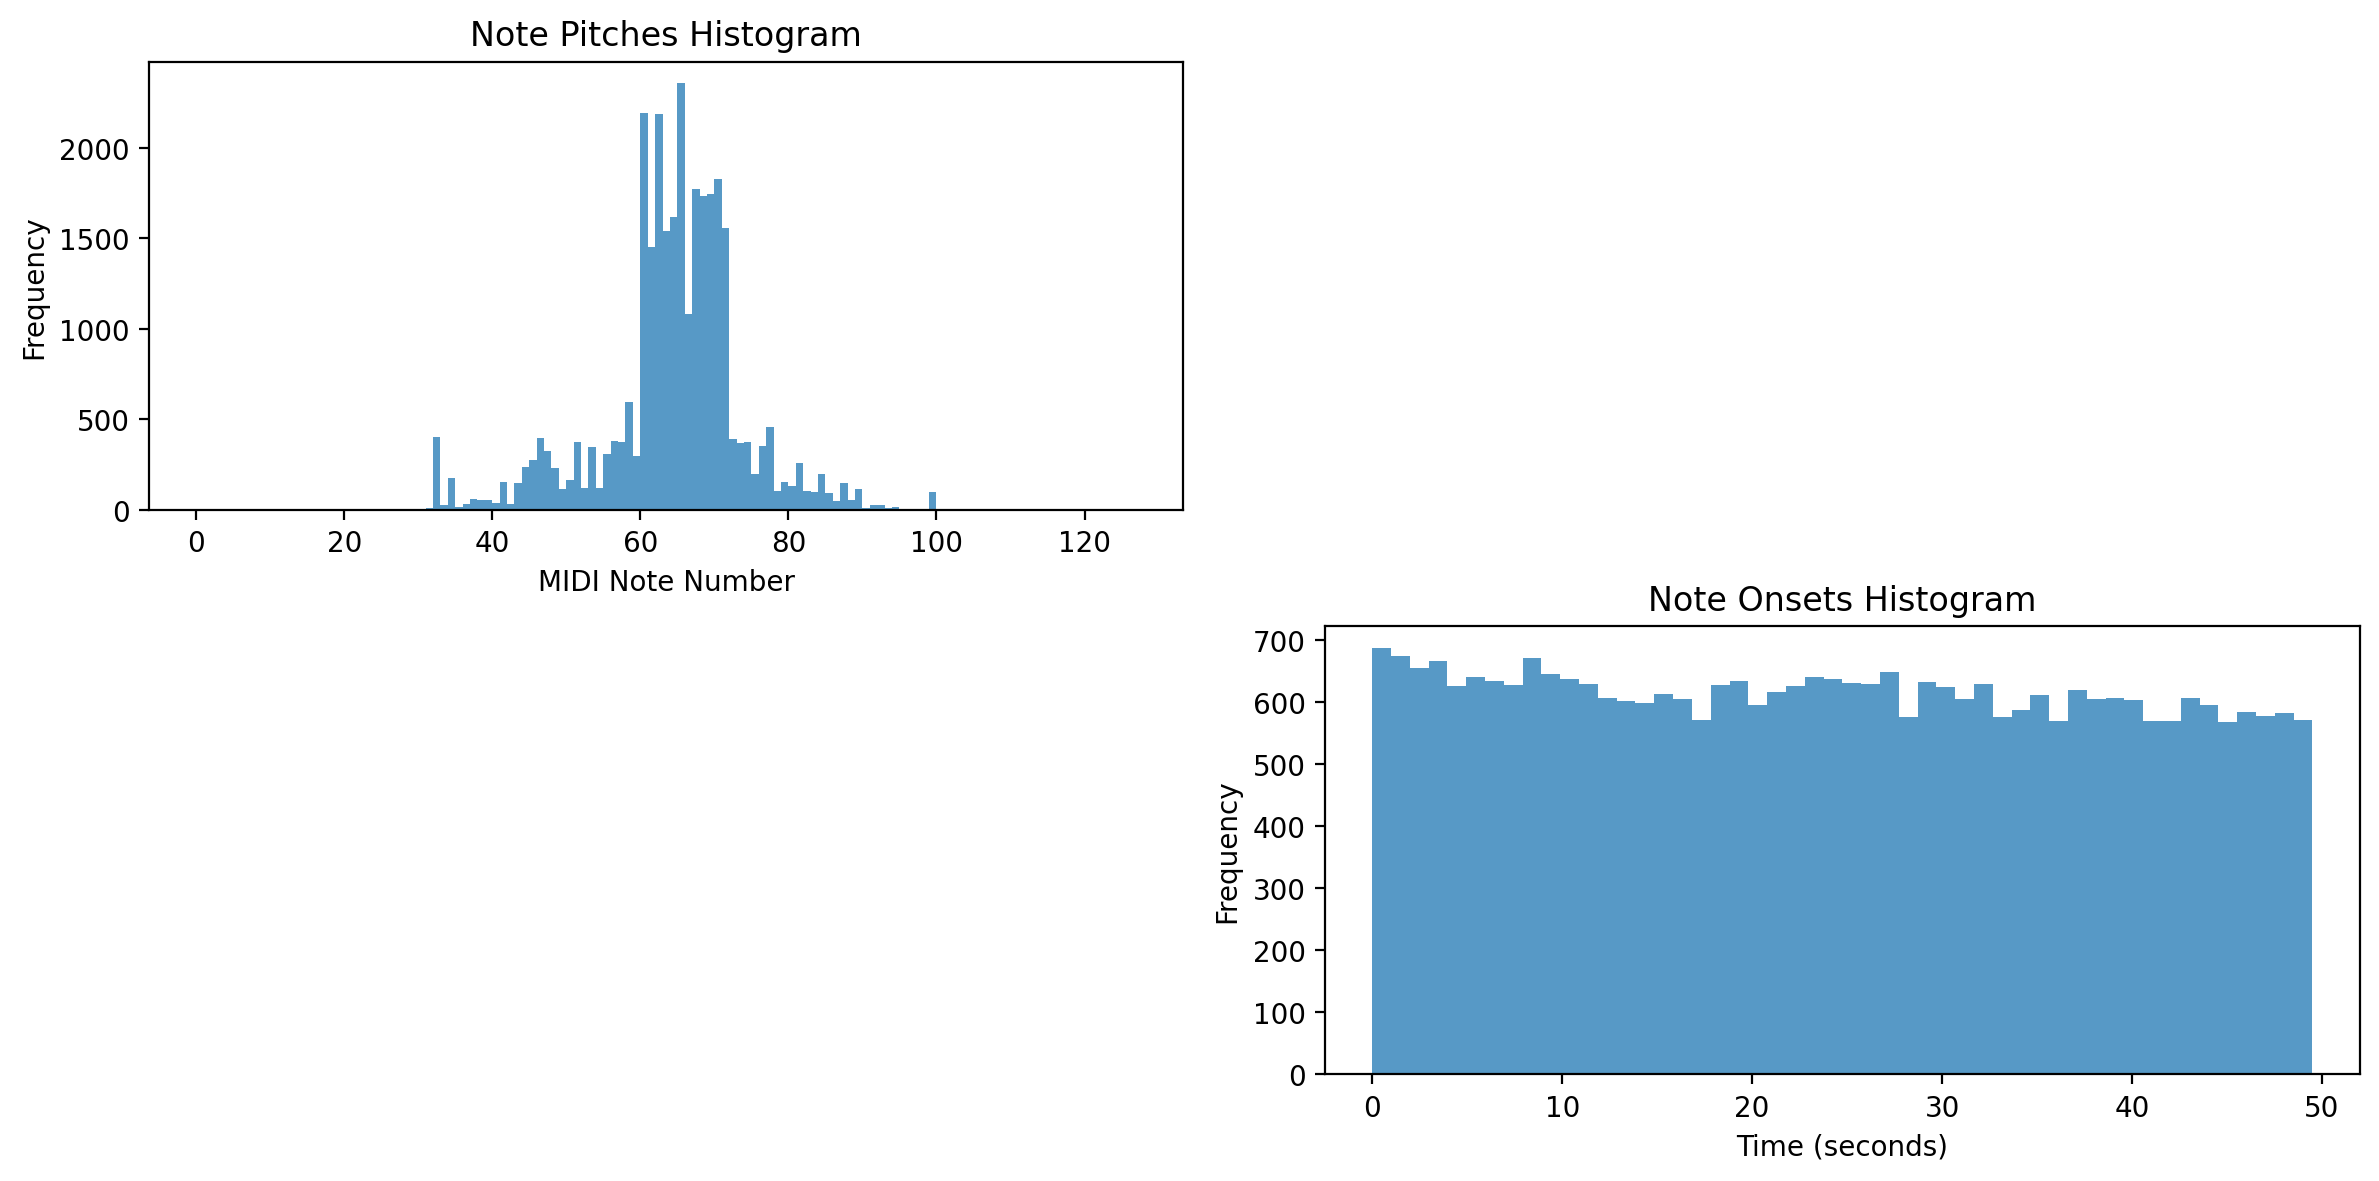

In [33]:
import os
import pretty_midi
import matplotlib.pyplot as plt

# Define the folder path containing MIDI files
directory_path = r"E:\Piano Dataset\LSTM_Generated_music_real"

# Get a list of all MIDI files in the directory
midi_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith(".mid")]

# List to store extracted musical features
note_pitches = []
note_onsets = []

# Load MIDI files and extract features
for midi_file in midi_files:
    try:
        midi_data = pretty_midi.PrettyMIDI(midi_file)
        for instrument in midi_data.instruments:
            for note in instrument.notes:
                note_pitches.append(note.pitch)
                note_onsets.append(note.start)
    except Exception as e:
        print(f"Error loading {midi_file}: {e}")

# Visualize musical features
plt.figure(figsize=(12, 6))

# Plot histograms
plt.subplot(2, 2, 1)
plt.hist(note_pitches, bins=range(128), alpha=0.75)
plt.title("Note Pitches Histogram")
plt.xlabel("MIDI Note Number")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.hist(note_onsets, bins=50, alpha=0.75)
plt.title("Note Onsets Histogram")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Pitch Interval')

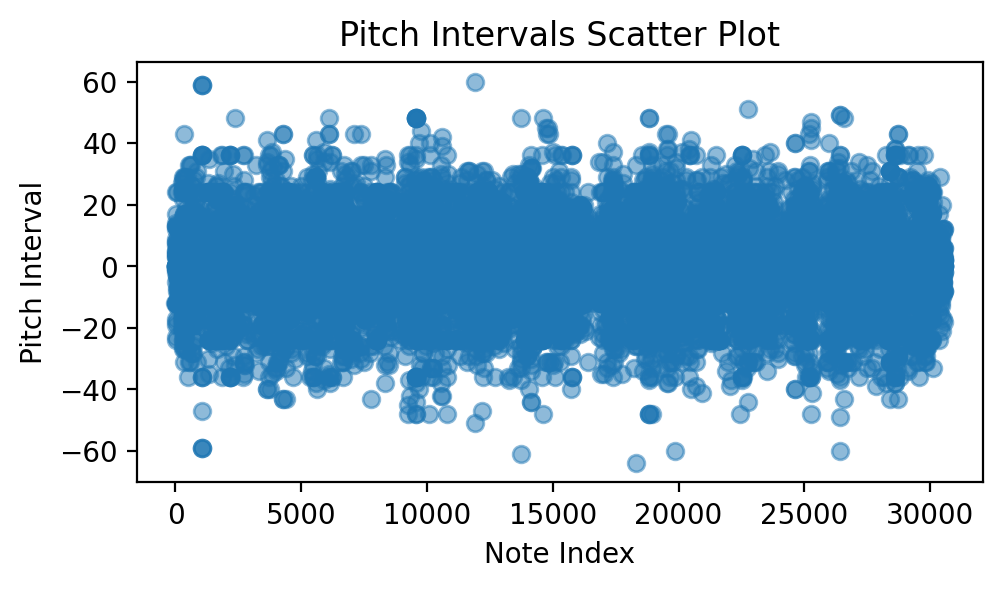

In [22]:
import numpy as np
pitch_intervals = []
note_counts = []
note_durations = []

# Load MIDI files and extract features
for midi_file in midi_files:
    try:
        midi_data = pretty_midi.PrettyMIDI(midi_file)
        
        # Extract pitch intervals between consecutive notes
        note_onsets = [note.start for note in midi_data.instruments[0].notes]
        note_onsets.sort()
        for i in range(1, len(note_onsets)):
            pitch_intervals.append(midi_data.instruments[0].notes[i].pitch - midi_data.instruments[0].notes[i-1].pitch)
    except Exception as e:
        print(f"Error loading {midi_file}: {e}")

# Visualize additional musical features
plt.figure(figsize=(12, 6))

# Pitch Intervals Scatter Plot
plt.subplot(2, 2, 1)
plt.scatter(range(len(pitch_intervals)), pitch_intervals, alpha=0.5)
plt.title("Pitch Intervals Scatter Plot")
plt.xlabel("Note Index")
plt.ylabel("Pitch Interval")

In [35]:
# Lists to store musical features
note_durations = []
pitch_ranges = []
unique_pitches = set()
pitch_intervals = []

# Load MIDI files and extract features
for midi_file in midi_files:
    try:
        midi_data = pretty_midi.PrettyMIDI(midi_file)
        
        # Extract note durations,unique pitches and pitch intervals
        durations = [note.end - note.start for note in midi_data.instruments[0].notes if isinstance(note, pretty_midi.Note)]
        note_durations.extend(durations)
        pitches = [note.pitch for note in midi_data.instruments[0].notes if isinstance(note, pretty_midi.Note)]
        unique_pitches.update(pitches)
        intervals = [abs(pitches[i] - pitches[i-1]) for i in range(1, len(pitches))]
        pitch_intervals.extend(intervals)  
        
        # Extract pitch range (highest pitch - lowest pitch)
        pitches = [note.pitch for note in midi_data.instruments[0].notes if isinstance(note, pretty_midi.Note)]
        pitch_range = max(pitches) - min(pitches)
        pitch_ranges.append(pitch_range)
        
    except Exception as e:
        print(f"Error loading {midi_file}: {e}")

# Calculate average note duration and pitch range
average_note_duration = sum(note_durations) / len(note_durations)
average_pitch_range = sum(pitch_ranges) / len(pitch_ranges)
num_unique_pitches = len(unique_pitches)
average_pitch_interval = np.mean(pitch_intervals)
# Print analysis results
print(f"Average Note Duration: {average_note_duration:.2f} seconds")
print(f"Average Pitch Range: {average_pitch_range:.2f}")
print(f"Number of Unique Pitches: {num_unique_pitches}")
print(f"Average Pitch Interval: {average_pitch_interval:.2f}")

Average Note Duration: 0.50 seconds
Average Pitch Range: 43.57
Number of Unique Pitches: 73
Average Pitch Interval: 5.88
